## 1. Importy

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import permutation_test
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.graphics.gofplots as sm
from itertools import combinations
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as hierarchy
from scipy import stats
from sklearn.metrics import r2_score
import scipy.stats as stats
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

## 2. Funkcje

In [2]:
def plot(data, res, feature, prediction):
    fig, axs = plt.subplots(2,2, squeeze=False)
    data['Prediction'] = res.predict(data)
    plt.tight_layout()

    ax = data.plot.scatter(x=feature,y=prediction, ax=axs[0,0])
    data.plot(x=feature,y='Prediction', ax=axs[0,0], color='red', style='s')
    # plt.subplot(2,2,2)
    residuals = res.predict(data)-data[prediction]
    axs[0,1].scatter(data[feature], (residuals))
    axs[0,1].set_xlabel(feature)
    axs[0,1].set_ylabel('Residual values')

    axs[1,0].hist(residuals)
    axs[1,0].set_ylabel('frequency')
    axs[1,0].set_xlabel('residuual values')
    plt.subplot(2,2,4)
    sm.qqplot(residuals, stats.t, distargs=(4,), loc=3, scale=10, fit=True, ax=axs[1,1], line='s')
    plt.tight_layout()

def statistic(x, y, axis=0):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

def ABtests(dataframe, store_types, feature1, feature2):

    alpha = 0.05
    for type1, type2 in combinations(store_types, 2):
        group1 = dataframe[dataframe[feature1] == type1][feature2]
        group2 = dataframe[dataframe[feature1] == type2][feature2]

        stats = permutation_test((group1, group2), statistic,
                            alternative='two-sided', n_resamples=100)

        p_value = stats.pvalue.round(5)
        observed = stats.statistic.round(5)
        null_distribution = stats.null_distribution


        print(f'Porównanie między {type1} a {type2}:')
        print(f'Statystyka testowa: {observed}')
        print(f'Wartość p: {p_value}')

        if p_value < alpha:
            print("Odrzucamy H0 na poziomie istotności 0.05. Istnieje istotna różnica między grupami.")
        else:
            print("Nie ma wystarczających dowodów na odrzucenie H0. Brak istotnej różnicy między grupami.")
        print('\n')

def tTest(dataframe, store_types, feature1, feature2):
    alpha = 0.05
    for type1, type2 in combinations(store_types, 2):
        group1 = dataframe[dataframe[feature1] == type1][feature2]
        group2 = dataframe[dataframe[feature1] == type2][feature2]

        t, p = stats.ttest_ind(group1, group2, equal_var=False)
        print(f'Porównanie między {type1} a {type2}:')
        print(f'Statystyka testowa: {t}')
        print(f'Wartość p: {p}')

        if p < alpha:
            print("Odrzucamy H0 na poziomie istotności 0.05. Istnieje istotna różnica między grupami.")
        else:
            print("Nie ma wystarczających dowodów na odrzucenie H0. Brak istotnej różnicy między grupami.")
        print('\n')

def boxPlotStoreType(df, column, storeType, states):
    plt.figure(figsize=(12, 8))

    for store_type in df['StoreType'].unique():
        plt.subplot(2, 2, int(store_type) + 1)
        sns.boxplot(x='State', y=column, hue='State', data=df[df['StoreType'] == store_type])
        plt.title(f'Boxplot for Store Type {storeType[store_type]}')
        plt.xlabel('State')
        plt.ylabel(column)

        plt.xticks(range(len(states)), [states[state] for state in df['State'].unique()])

    plt.tight_layout()
    plt.show()

def boxPlotDay(df, column, states):
    plt.figure(figsize=(12, 8))

    sorted_days = sorted(df['DayOfWeek'].unique())
    for day_of_week in sorted_days:
        # print(day_of_week)
        plt.subplot(3, 3, int(day_of_week) + 1)
        sns.boxplot(x='State', y=column, data=df[df['DayOfWeek'] == day_of_week])
        plt.title(f'Boxplot for Day Number {sorted_days[day_of_week]}')
        plt.xlabel('State')
        plt.ylabel(column)

        plt.xticks(range(len(states)), [states[state] for state in df['State'].unique()])

    plt.tight_layout()
    plt.show()

def boxPlotSchoolHoliday(df, column, states):
    plt.figure(figsize=(12, 8))

    holiday_day = sorted(df['SchoolHoliday'].unique())
    for holiday in holiday_day:
        # print(day_of_week)
        plt.subplot(2, 1, int(holiday) + 1)
        sns.boxplot(x='State', y=column, data=df[df['SchoolHoliday'] == holiday])
        plt.title(f'Boxplot for Day Type {holiday_day[holiday]}')
        plt.xlabel('State')
        plt.ylabel(column)

        plt.xticks(range(len(states)), [states[state] for state in df['State'].unique()])

    plt.tight_layout()
    plt.show()

def boxPlotPromo(df, column, states):
    plt.figure(figsize=(12, 8))

    promo_day = sorted(df['Promo'].unique())
    for promo in promo_day:
        plt.subplot(2, 1, int(promo) + 1)
        sns.boxplot(x='State', y=column, data=df[df['Promo'] == promo])
        plt.title(f'Boxplot for Promo Type {promo_day[promo]}')
        plt.xlabel('State')
        plt.ylabel(column)

        plt.xticks(range(len(states)), [states[state] for state in df['State'].unique()])

    plt.tight_layout()
    plt.show()

def boxPlotWeather(df, column, states):
    plt.figure(figsize=(12, 8))

    event_day = sorted(df['Events'].unique())
    for event in event_day:
        plt.subplot(5, 5, int(event) + 1)
        sns.boxplot(x='State', y=column, data=df[df['Events'] == event])
        plt.title(f'Boxplot for Events Type {event_day[event]}')
        plt.xlabel('State')
        plt.ylabel(column)

        plt.xticks(range(len(states)), [states[state] for state in df['State'].unique()])

    plt.tight_layout()
    plt.show()

def boxPlotStateHoliday(df, column, states):
    plt.figure(figsize=(12, 8))

    event_day = sorted(df['StateHoliday'].unique())
    for event in event_day:
        plt.subplot(2, 2, int(event) + 1)
        sns.boxplot(x='State', y=column, data=df[df['StateHoliday'] == event])
        plt.title(f'Boxplot for StateHoliday Type {event_day[event]}')
        plt.xlabel('State')
        plt.ylabel(column)

        plt.xticks(range(len(states)), [states[state] for state in df['State'].unique()])

    plt.tight_layout()
    plt.show()

## 3. Wczytywanie i obróbka danych danych

In [3]:
df_sales_raw = pd.read_csv("store_data.csv", low_memory=False)
df_store_raw = pd.read_csv("store.csv", low_memory=False)

df_states_raw = pd.read_csv("state_names.csv", low_memory=False)
df_store_states_raw = pd.read_csv("store_states.csv", low_memory=False)
df_weather_raw = pd.read_csv("weather.csv", low_memory=False)
df_weather_raw.rename(columns={'file': 'State'}, inplace=True)

# print(df_weather_raw.isna().sum())

label_encoder = LabelEncoder()
# df_sales_raw['StateHoliday'] = pd.to_numeric(df_sales_raw['StateHoliday'], errors='coerce').fillna(0).astype(int)
# df_sales_raw['SchoolHoliday'] = pd.to_numeric(df_sales_raw['SchoolHoliday'], errors='coerce').astype(int)

storeType = {0: 'a', 1: 'b', 2: 'c', 3: 'd'}

df_store_raw['StoreType'] = df_store_raw['StoreType'].map({'a': 0, 'b': 1, 'c': 2, 'd': 3})
df_store_raw['Assortment'] = df_store_raw['Assortment'].map({'a': 0, 'b': 1, 'c': 2})
df_sales_raw['StateHoliday'] = df_sales_raw['StateHoliday'].map({"0": 0, 'a': 1, 'b': 2, 'c': 3})

df_weather_raw['Events'] = label_encoder.fit_transform(df_weather_raw['Events'])


print("Przypisane wartości:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")


Przypisane wartości:
Fog: 0
Fog-Rain: 1
Fog-Rain-Hail: 2
Fog-Rain-Hail-Thunderstorm: 3
Fog-Rain-Snow: 4
Fog-Rain-Snow-Hail: 5
Fog-Rain-Thunderstorm: 6
Fog-Snow: 7
Fog-Snow-Hail: 8
Fog-Thunderstorm: 9
Rain: 10
Rain-Hail: 11
Rain-Hail-Thunderstorm: 12
Rain-Snow: 13
Rain-Snow-Hail: 14
Rain-Snow-Hail-Thunderstorm: 15
Rain-Snow-Thunderstorm: 16
Rain-Thunderstorm: 17
Snow: 18
Snow-Hail: 19
Thunderstorm: 20
nan: 21


In [4]:
df_raw = pd.merge(df_sales_raw, df_store_raw, how="left", on="Store")
df_raw = pd.merge(df_raw, df_store_states_raw, how="left", on="Store")

df_raw['State'] = df_raw['State'].map(dict(zip(df_states_raw['State'], df_states_raw['StateName'])))


# print(df_raw['State'].unique())
# print(df_weather_raw['file'].unique())
df_raw = pd.merge(df_raw, df_weather_raw, how="left", left_on=['Date', 'State'], right_on=['Date', 'State'])

df_raw['State'] = df_raw['State'].map(dict(zip(df_states_raw['StateName'], df_states_raw['State'])))

df_raw['Date'] = pd.to_datetime(df_raw['Date'])
df_raw['Day'] = df_raw['Date'].dt.day
df_raw['Month'] = df_raw['Date'].dt.month
df_raw['Year'] = df_raw['Date'].dt.year
df_raw['DayOfWeek'] = df_raw['Date'].dt.weekday # poniedzialek to 0, niedzielaa to 6
df_raw['WeekOfMonth'] = (df_raw['Date'].dt.day - 1) // 7 + 1

df_raw['State'] = label_encoder.fit_transform(df_raw['State'])

states = {}

for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")
    states[encoded_value] = category

df_raw['BasketValue'] = df_raw['Sales'] / df_raw['Customers']

print("Number of Rows: {}".format(df_raw.shape[0]))
print("NUmber of Cols: {}".format(df_raw.shape[1]))

df_raw['WeekOfMonth']

BE: 0
BW: 1
BY: 2
HB,NI: 3
HE: 4
HH: 5
NW: 6
RP: 7
SH: 8
SN: 9
ST: 10
TH: 11
Number of Rows: 1017209
NUmber of Cols: 46


0          5
1          5
2          5
3          5
4          5
          ..
1017204    1
1017205    1
1017206    1
1017207    1
1017208    1
Name: WeekOfMonth, Length: 1017209, dtype: int64

In [5]:
# df_raw = df_raw[df_raw.loc[:, 'Open'] != 0].reset_index(drop=True)
# df_raw.drop(['Open'], axis=1, inplace=True)
# df_raw

In [6]:
df_raw.dtypes

Store                                  int64
DayOfWeek                              int64
Date                          datetime64[ns]
Sales                                  int64
Customers                              int64
Open                                   int64
Promo                                  int64
StateHoliday                           int64
SchoolHoliday                          int64
StoreType                              int64
Assortment                             int64
CompetitionDistance                  float64
CompetitionOpenSinceMonth            float64
CompetitionOpenSinceYear             float64
Promo2                                 int64
Promo2SinceWeek                      float64
Promo2SinceYear                      float64
PromoInterval                         object
State                                  int64
Max_TemperatureC                       int64
Mean_TemperatureC                      int64
Min_TemperatureC                       int64
Dew_PointC

In [7]:
df_raw['StateHoliday']
# df_raw['StateHoliday'] = df_raw['StateHoliday'].astype('category')

0          0
1          0
2          0
3          0
4          0
          ..
1017204    1
1017205    1
1017206    1
1017207    1
1017208    1
Name: StateHoliday, Length: 1017209, dtype: int64

In [8]:
df_raw.isna().mean()

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.002597
CompetitionOpenSinceMonth     0.317878
CompetitionOpenSinceYear      0.317878
Promo2                        0.000000
Promo2SinceWeek               0.499436
Promo2SinceYear               0.499436
PromoInterval                 0.499436
State                         0.000000
Max_TemperatureC              0.000000
Mean_TemperatureC             0.000000
Min_TemperatureC              0.000000
Dew_PointC                    0.000000
MeanDew_PointC                0.000000
Min_DewpointC                 0.000000
Max_Humidity             

In [9]:
for column in df_raw.select_dtypes(include='number').columns:
    # Check if there are any NaN values in the column
    if df_raw[column].isnull().any():
        # Calculate the median of the column excluding NaN values
        median_value = np.nanmedian(df_raw[column])
        
        # Replace NaN values with the median
        df_raw[column].fillna(median_value, inplace=True)


In [10]:
df_raw.isna().mean()

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.000000
CompetitionOpenSinceMonth     0.000000
CompetitionOpenSinceYear      0.000000
Promo2                        0.000000
Promo2SinceWeek               0.000000
Promo2SinceYear               0.000000
PromoInterval                 0.499436
State                         0.000000
Max_TemperatureC              0.000000
Mean_TemperatureC             0.000000
Min_TemperatureC              0.000000
Dew_PointC                    0.000000
MeanDew_PointC                0.000000
Min_DewpointC                 0.000000
Max_Humidity             

In [11]:
df_raw

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          4 2015-07-31   5263        555     1      1   
1            2          4 2015-07-31   6064        625     1      1   
2            3          4 2015-07-31   8314        821     1      1   
3            4          4 2015-07-31  13995       1498     1      1   
4            5          4 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1111          1 2013-01-01      0          0     0      0   
1017205   1112          1 2013-01-01      0          0     0      0   
1017206   1113          1 2013-01-01      0          0     0      0   
1017207   1114          1 2013-01-01      0          0     0      0   
1017208   1115          1 2013-01-01      0          0     0      0   

         StateHoliday  SchoolHoliday  StoreType  ...  Max_Gust_SpeedKm_h  \
0                   0              1          2  ...                47.0   
1                   0              1          0  ...                47.0   
2                   0              1          0  ...                47.0   
3                   0              1          2  ...                47.0   
4                   0              1          0  ...                47.0   
...               ...            ...        ...  ...                 ...   
1017204             1              1          0  ...                58.0   
1017205             1              1          2  ...                58.0   
1017206             1              1          0  ...                47.0   
1017207             1              1          0  ...                63.0   
1017208             1              1          3  ...                39.0   

         Precipitationmm  CloudCover  Events  WindDirDegrees  Day  Month  \
0                   0.00         1.0       0              13   31      7   
1                   0.00         4.0       0             309   31      7   
2                   0.00         2.0       0             354   31      7   
3                   0.00         6.0      21             282   31      7   
4                   0.00         4.0      21             290   31      7   
...                  ...         ...     ...             ...  ...    ...   
1017204             5.08         6.0      10             215    1      1   
1017205             5.08         6.0      10             215    1      1   
1017206             0.00         6.0      10             251    1      1   
1017207             6.10         6.0      10             234    1      1   
1017208             2.03         6.0      10             206    1      1   

         Year  WeekOfMonth  BasketValue  
0        2015            5     9.482883  
1        2015            5     9.702400  
2        2015            5    10.126675  
3        2015            5     9.342457  
4        2015            5     8.626118  
...       ...          ...          ...  
1017204  2013            1     9.250000  
1017205  2013            1     9.250000  
1017206  2013            1     9.250000  
1017207  2013            1     9.250000  
1017208  2013            1     9.250000  

[1017209 rows x 46 columns]

In [12]:
# miesiace promocji
df_raw.isna().sum()

Store                              0
DayOfWeek                          0
Date                               0
Sales                              0
Customers                          0
Open                               0
Promo                              0
StateHoliday                       0
SchoolHoliday                      0
StoreType                          0
Assortment                         0
CompetitionDistance                0
CompetitionOpenSinceMonth          0
CompetitionOpenSinceYear           0
Promo2                             0
Promo2SinceWeek                    0
Promo2SinceYear                    0
PromoInterval                 508031
State                              0
Max_TemperatureC                   0
Mean_TemperatureC                  0
Min_TemperatureC                   0
Dew_PointC                         0
MeanDew_PointC                     0
Min_DewpointC                      0
Max_Humidity                       0
Mean_Humidity                      0
M

In [13]:
df_models = df_raw.copy()

## 4. Analiza danych

### 4.1 Korelacja oraz dendogram dla danych całościowych

/tmp/ipykernel_6587/2788221449.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_raw.corr()


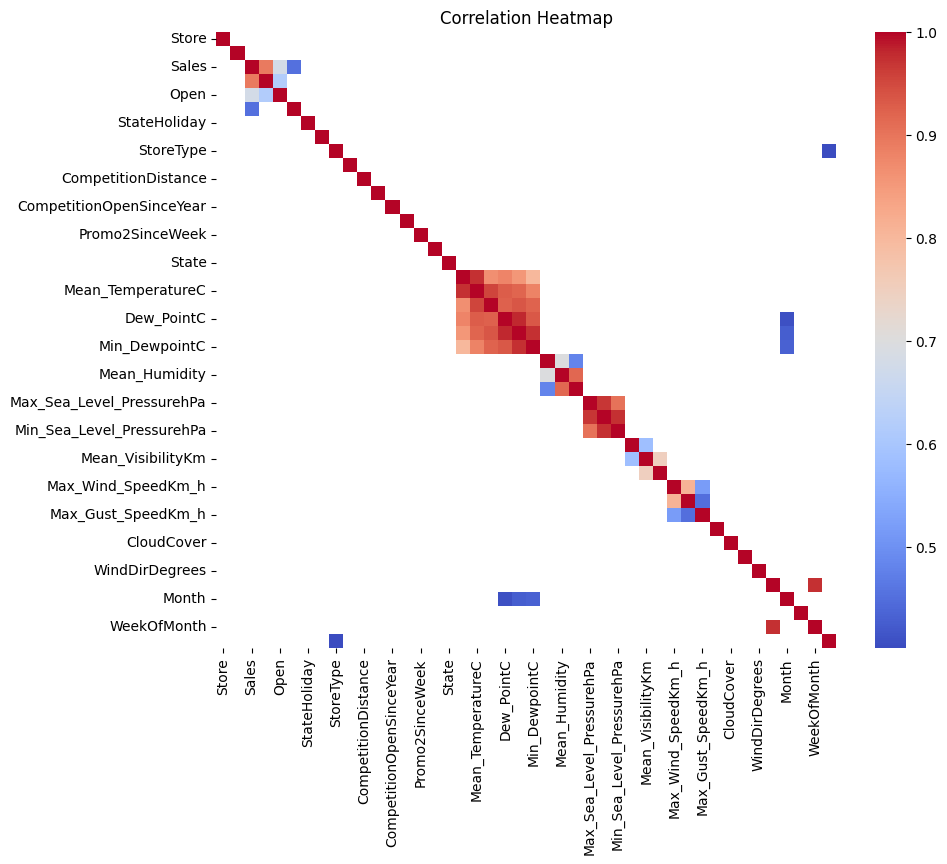

In [13]:
plt.figure(figsize=(10, 8))
corrmat = df_raw.corr()

high_corr = corrmat[corrmat > 0.4]

sns.heatmap(high_corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


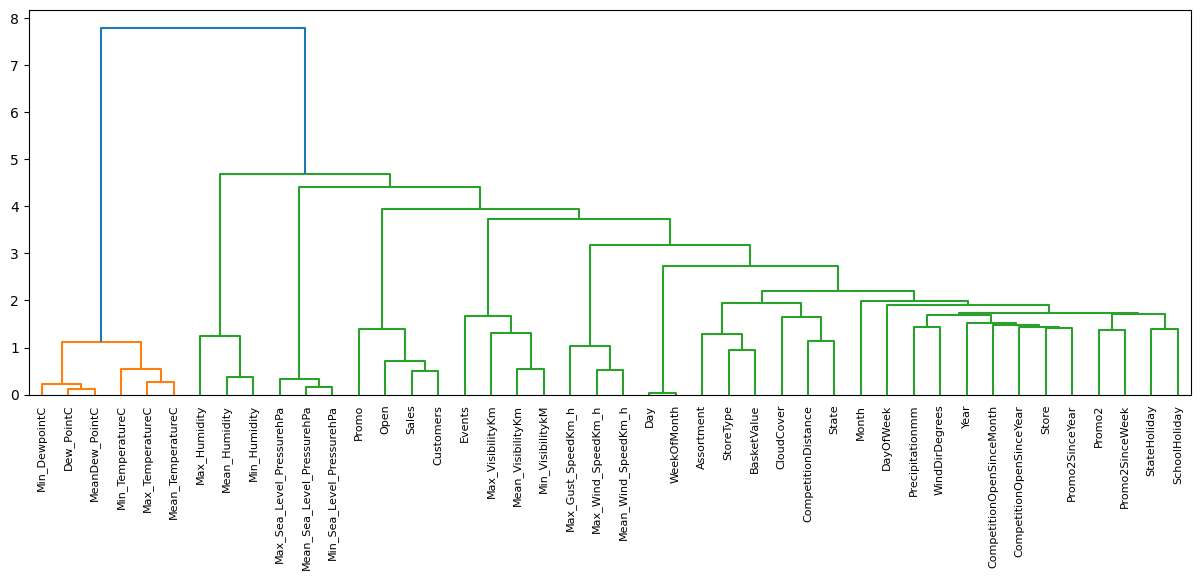

In [14]:
from scipy.cluster import hierarchy
finite_corrmat = np.nan_to_num(corrmat)
Z = hierarchy.linkage(finite_corrmat, 'ward')
plt.figure(figsize=(15,5))
dn = hierarchy.dendrogram(Z, labels=corrmat.columns)


### Z przeprowadzonej korelacji oraz wyznaczenie dendogramu wynika iż cena produktu najbardziej zależy od promocji, tego czy sklep działa oraz ilości klientów

### 4.2 Korelacja oraz dendogram dla danych z podziałem na landy

/tmp/ipykernel_6587/1435202645.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = land_data.corr()


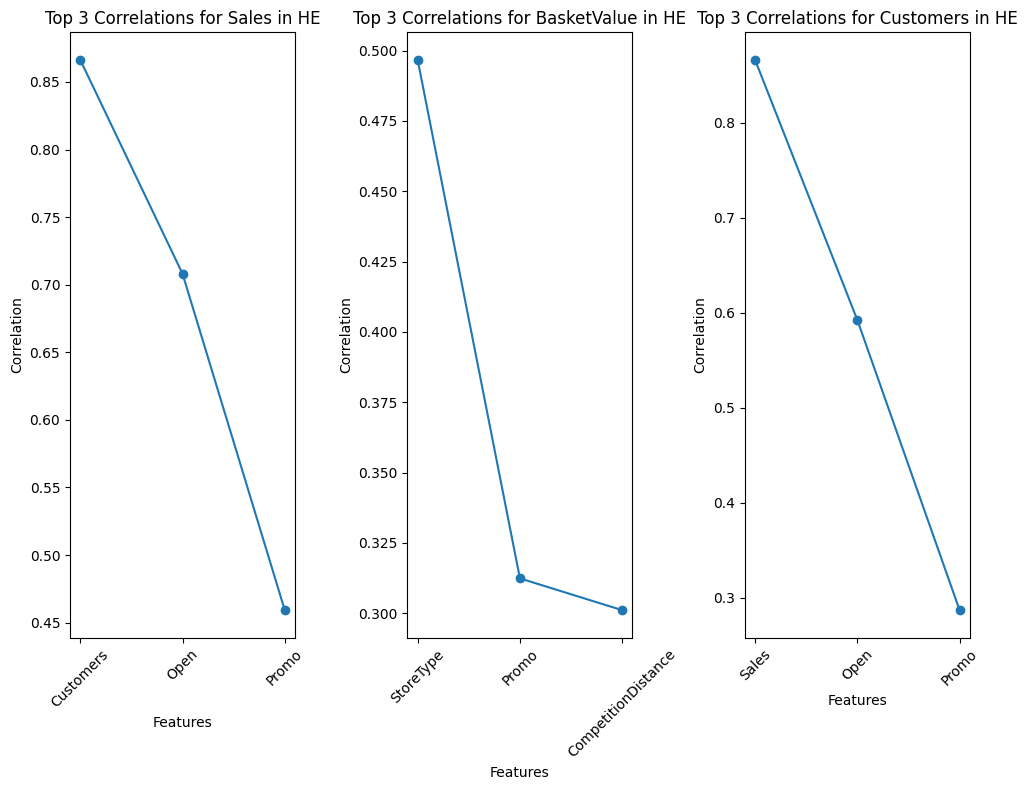

/tmp/ipykernel_6587/1435202645.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = land_data.corr()


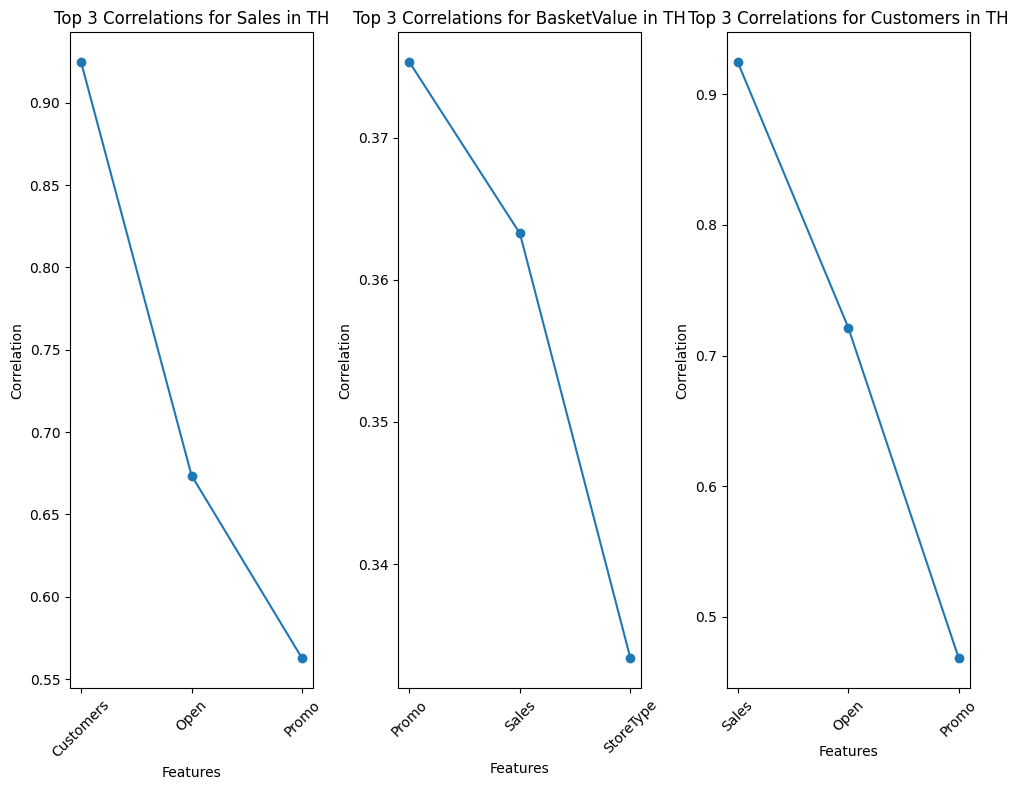

/tmp/ipykernel_6587/1435202645.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = land_data.corr()


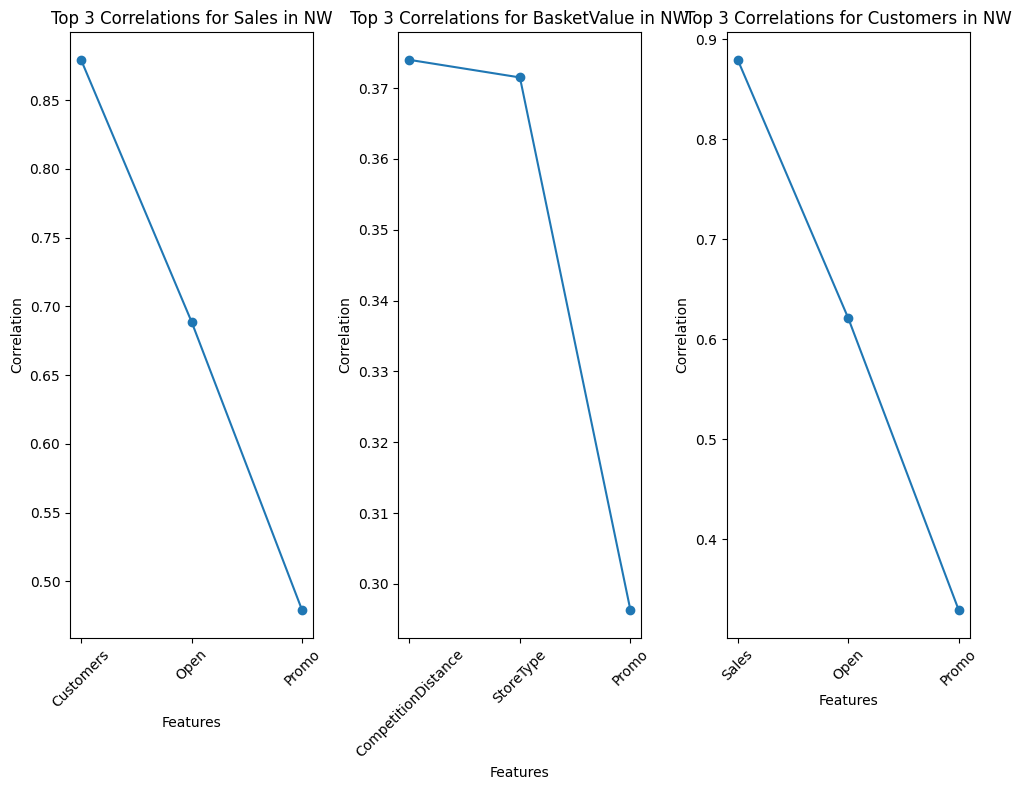

/tmp/ipykernel_6587/1435202645.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = land_data.corr()


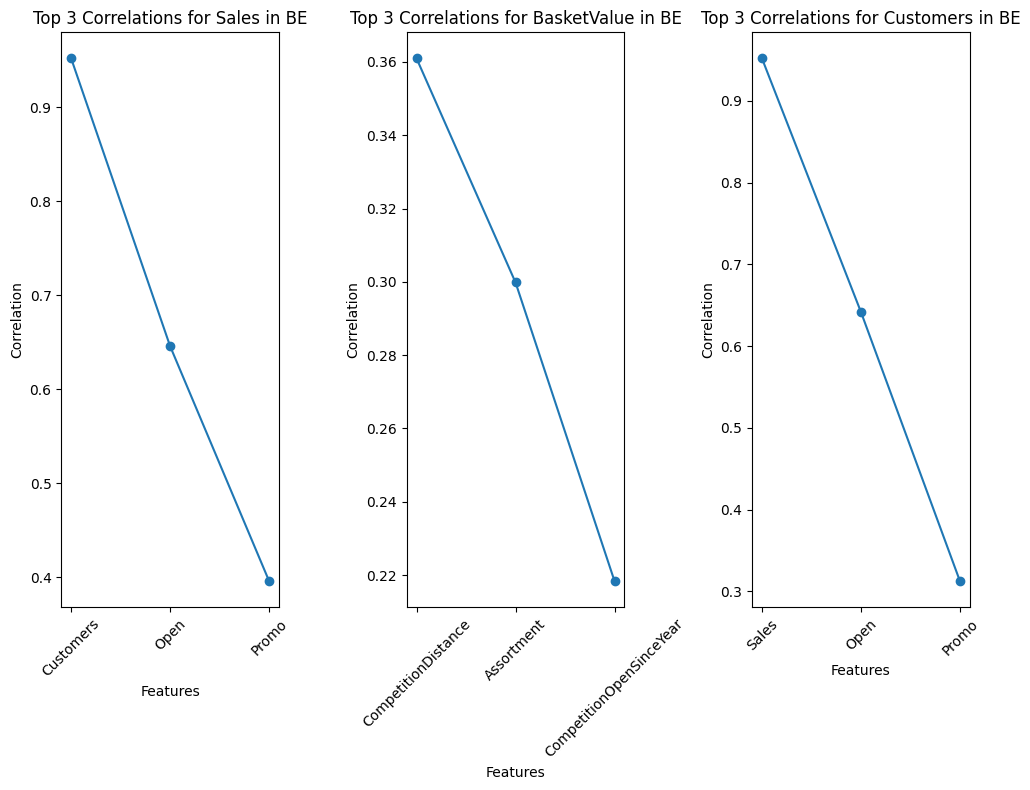

/tmp/ipykernel_6587/1435202645.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = land_data.corr()


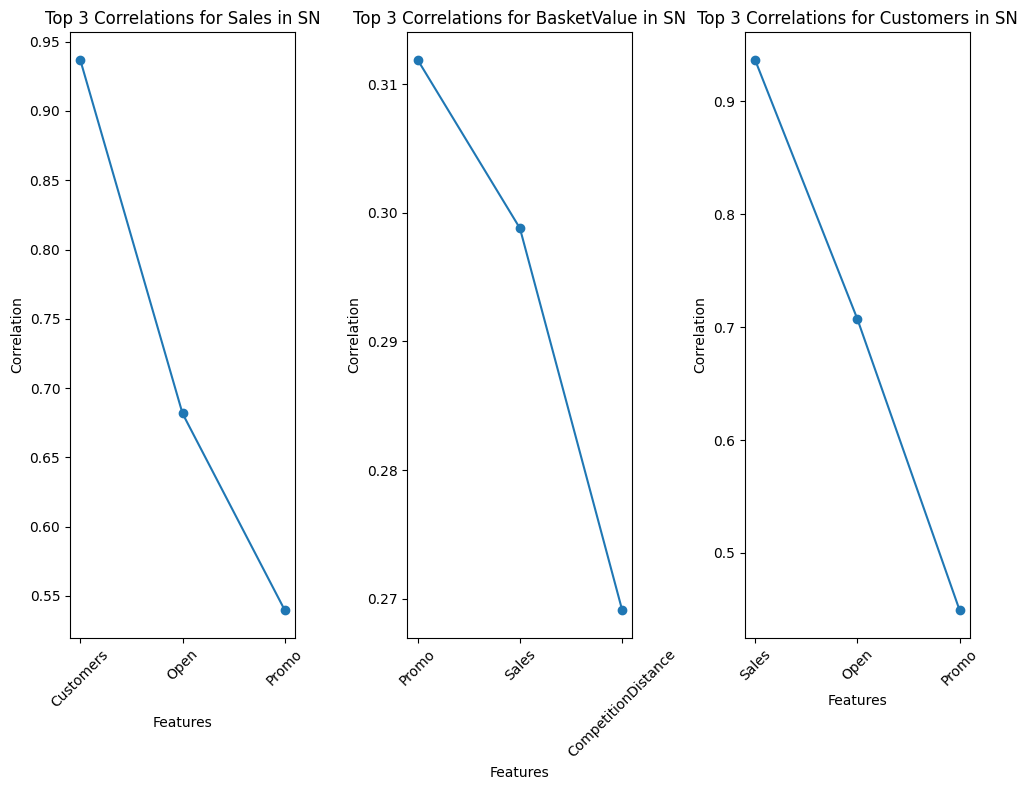

/tmp/ipykernel_6587/1435202645.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = land_data.corr()


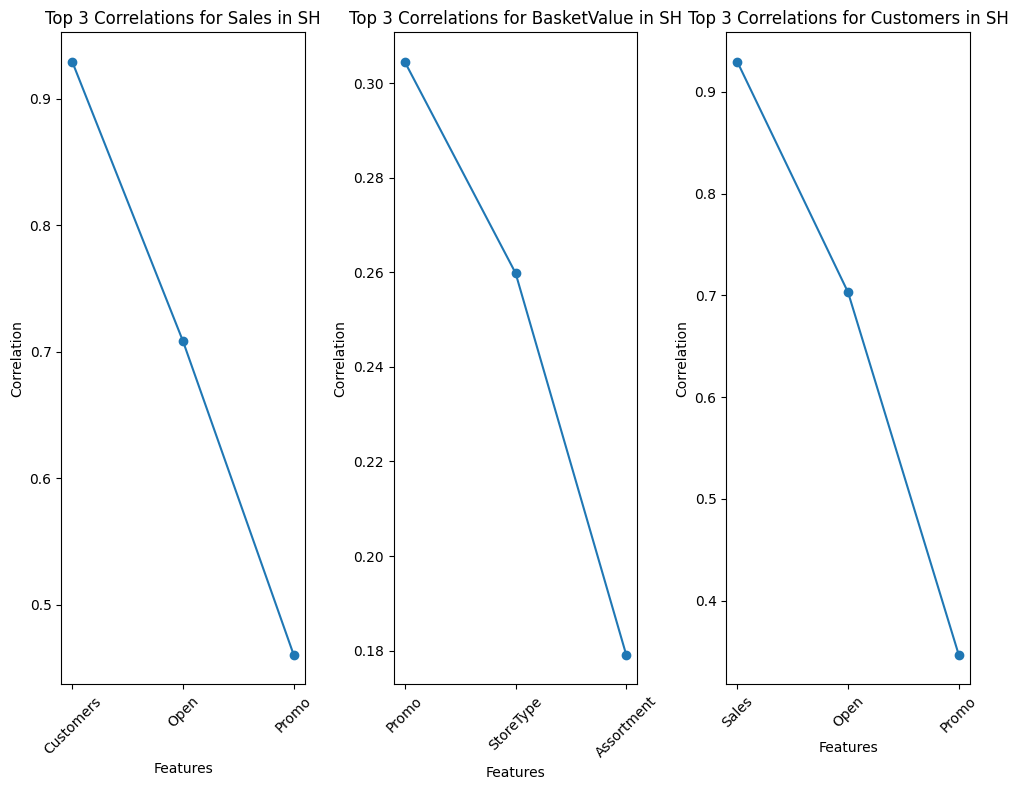

/tmp/ipykernel_6587/1435202645.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = land_data.corr()


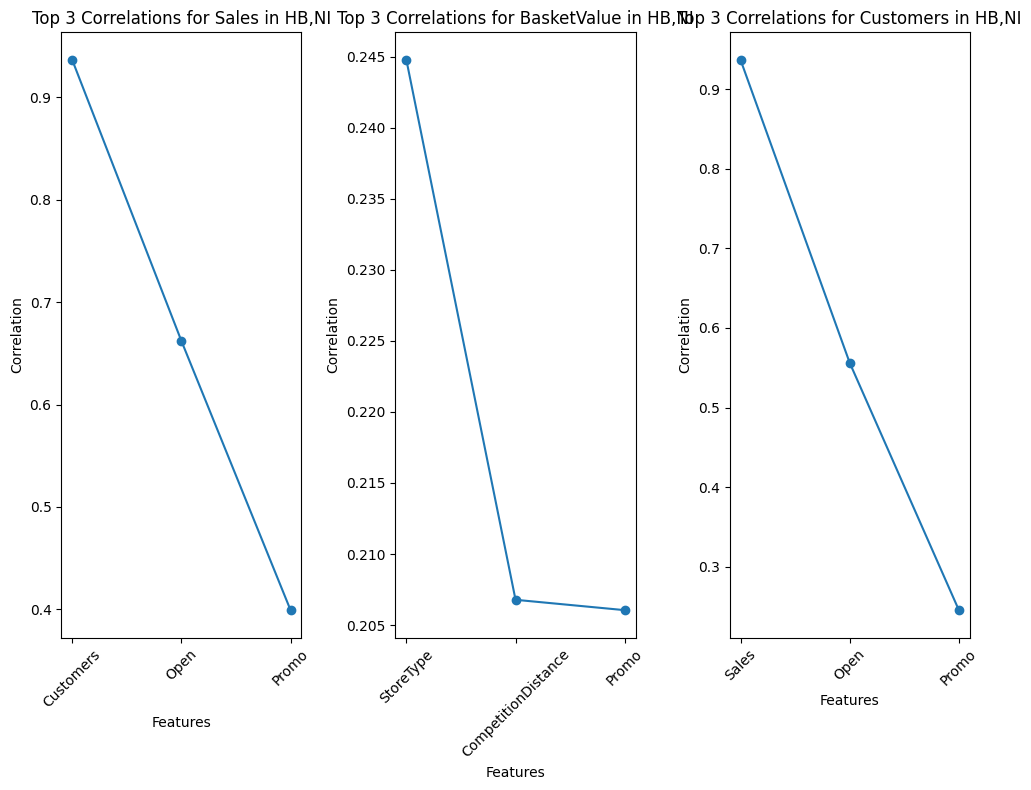

/tmp/ipykernel_6587/1435202645.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = land_data.corr()


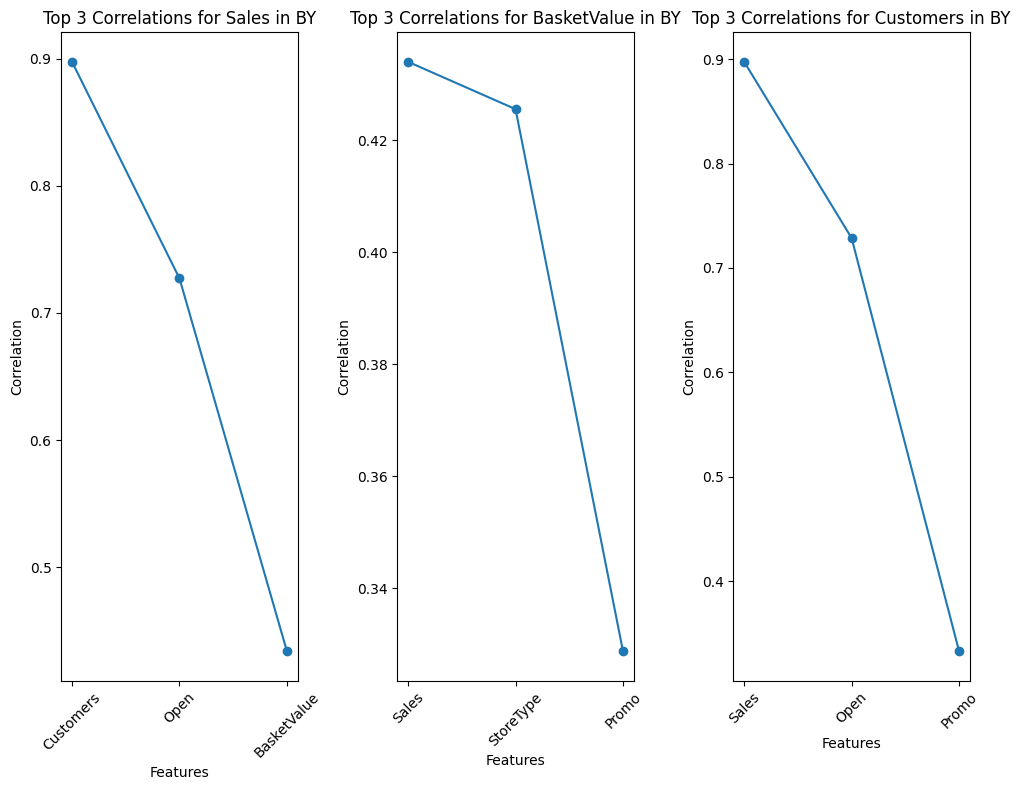

/tmp/ipykernel_6587/1435202645.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = land_data.corr()


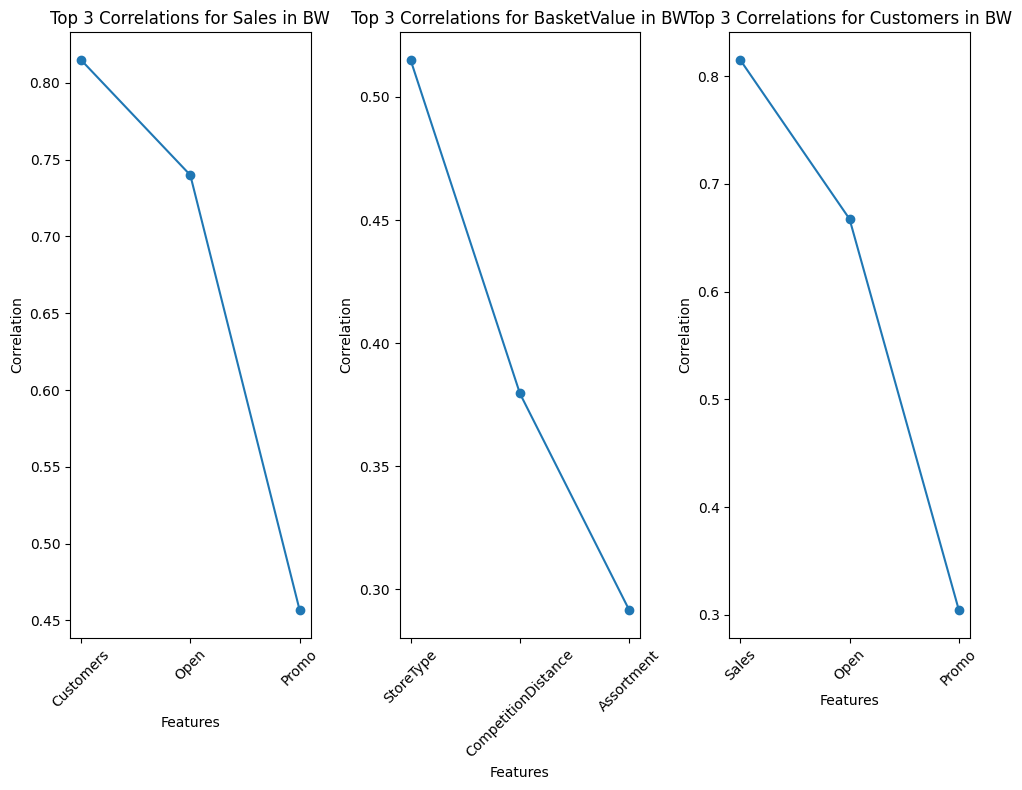

/tmp/ipykernel_6587/1435202645.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = land_data.corr()


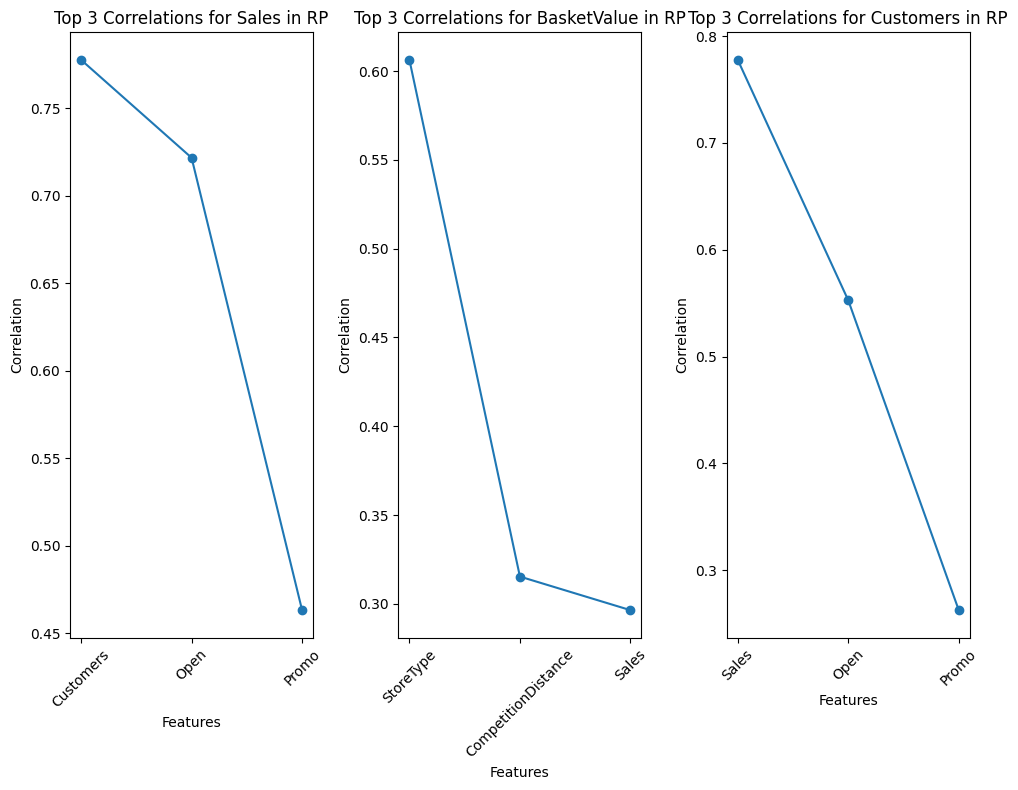

/tmp/ipykernel_6587/1435202645.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = land_data.corr()


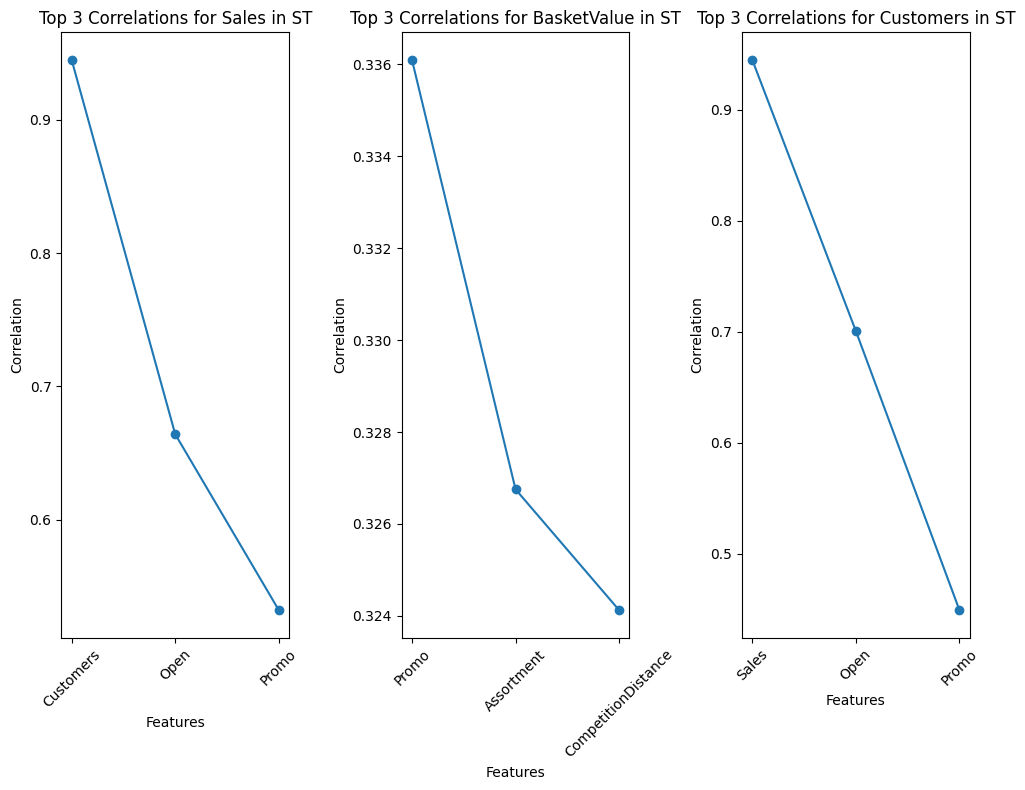

/tmp/ipykernel_6587/1435202645.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = land_data.corr()


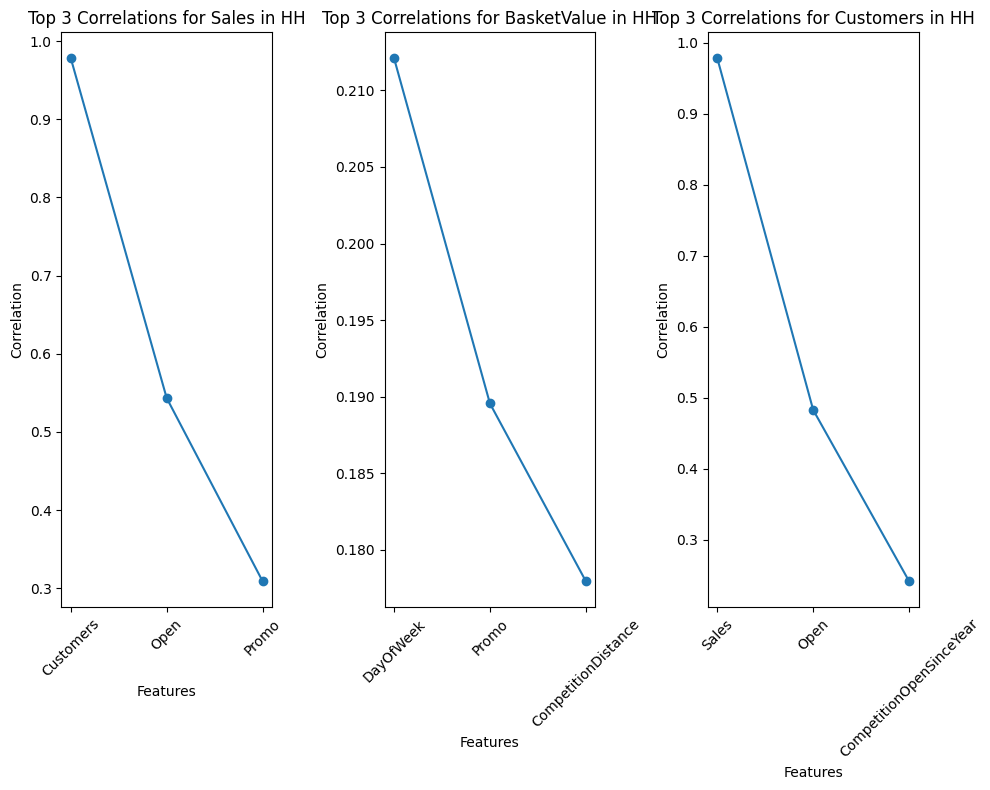

In [15]:
lands = df_raw['State'].unique()

for land in lands:
    land_data = df_raw[df_raw['State'] == land]
    
    plt.figure(figsize=(10, 8))
    corrmat = land_data.corr()
    
    # Get the top 3 correlation values for Sales, BasketValue, and Customers
    top_corr_sales = corrmat['Sales'].nlargest(4)[1:]
    top_corr_basket = corrmat['BasketValue'].nlargest(4)[1:]
    top_corr_customers = corrmat['Customers'].nlargest(4)[1:]
    
    # Plot the correlation values for Sales
    plt.subplot(1, 3, 1)
    plt.plot(top_corr_sales.index, top_corr_sales.values, marker='o')
    plt.title(f'Top 3 Correlations for Sales in {states[land]}')
    plt.xlabel('Features')
    plt.ylabel('Correlation')
    plt.xticks(rotation=45)
    
    # Plot the correlation values for BasketValue
    plt.subplot(1, 3, 2)
    plt.plot(top_corr_basket.index, top_corr_basket.values, marker='o')
    plt.title(f'Top 3 Correlations for BasketValue in {states[land]}')
    plt.xlabel('Features')
    plt.ylabel('Correlation')
    plt.xticks(rotation=45)
    
    # Plot the correlation values for Customers
    plt.subplot(1, 3, 3)
    plt.plot(top_corr_customers.index, top_corr_customers.values, marker='o')
    plt.title(f'Top 3 Correlations for Customers in {states[land]}')
    plt.xlabel('Features')
    plt.ylabel('Correlation')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


### 4.3. Czynniki wpływające na sprzedaż oraz na liczbę odwiedzających i wartość koszyka

Bartłomiej Gasyna
kaczmar: 

najpierw wykreślić boxploty (widać tam ze np. w niedziele są zamknięte sklepy i to trzeba uwzględnić)

potem korelacje (cena w przeliczeniu na klienta)

regresja np. OLS

#### 4.3.1. Typ sklepu

#### Ilość danych typów sklepów

In [16]:
store_types = df_raw['StoreType'].unique()
df_raw['StoreType'].value_counts()

0    551627
3    312912
2    136840
1     15830
Name: StoreType, dtype: int64

#### Boxplot

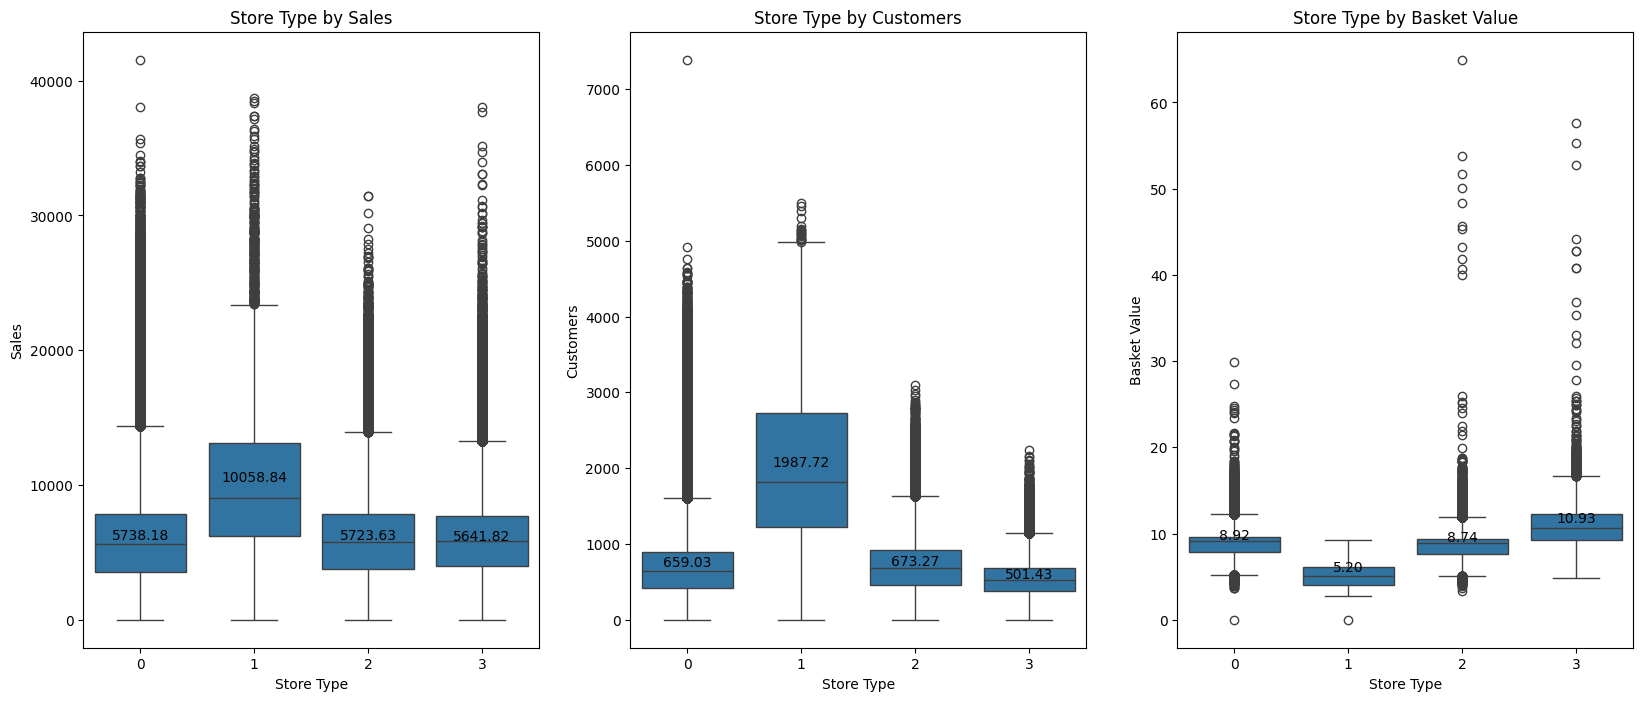

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.boxplot(x='StoreType', y='Sales', data=df_raw, ax=ax[0])
ax[0].set_title('Store Type by Sales')
ax[0].set_xlabel('Store Type')
ax[0].set_ylabel('Sales')


mean_sales = df_raw.groupby('StoreType')['Sales'].mean()
for i, mean in enumerate(mean_sales):
    ax[0].text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

sns.boxplot(x='StoreType', y='Customers', data=df_raw, ax=ax[1])
ax[1].set_title('Store Type by Customers')
ax[1].set_xlabel('Store Type')
ax[1].set_ylabel('Customers')


mean_customers = df_raw.groupby('StoreType')['Customers'].mean()
for i, mean in enumerate(mean_customers):
    ax[1].text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

sns.boxplot(x='StoreType', y='BasketValue', data=df_raw, ax=ax[2])
ax[2].set_title('Store Type by Basket Value')
ax[2].set_xlabel('Store Type')
ax[2].set_ylabel('Basket Value')


mean_basket_value = df_raw.groupby('StoreType')['BasketValue'].mean()
for i, mean in enumerate(mean_basket_value):
    ax[2].text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

plt.show()


Widać że sklep typu B ma największy obrót i najwięcej klientów ale najmniejszą wartość koszyka. Może to oznaczać lokalizacje tego typu sklepu w bardzo często odwiedzanych miejscach gdzie dużo ludzi wchodzi tylko po drobne zakupy.

In [18]:
storeType

{0: 'a', 1: 'b', 2: 'c', 3: 'd'}

#### Box ploty z podziałem na typ sklepu i landy, normalizacja

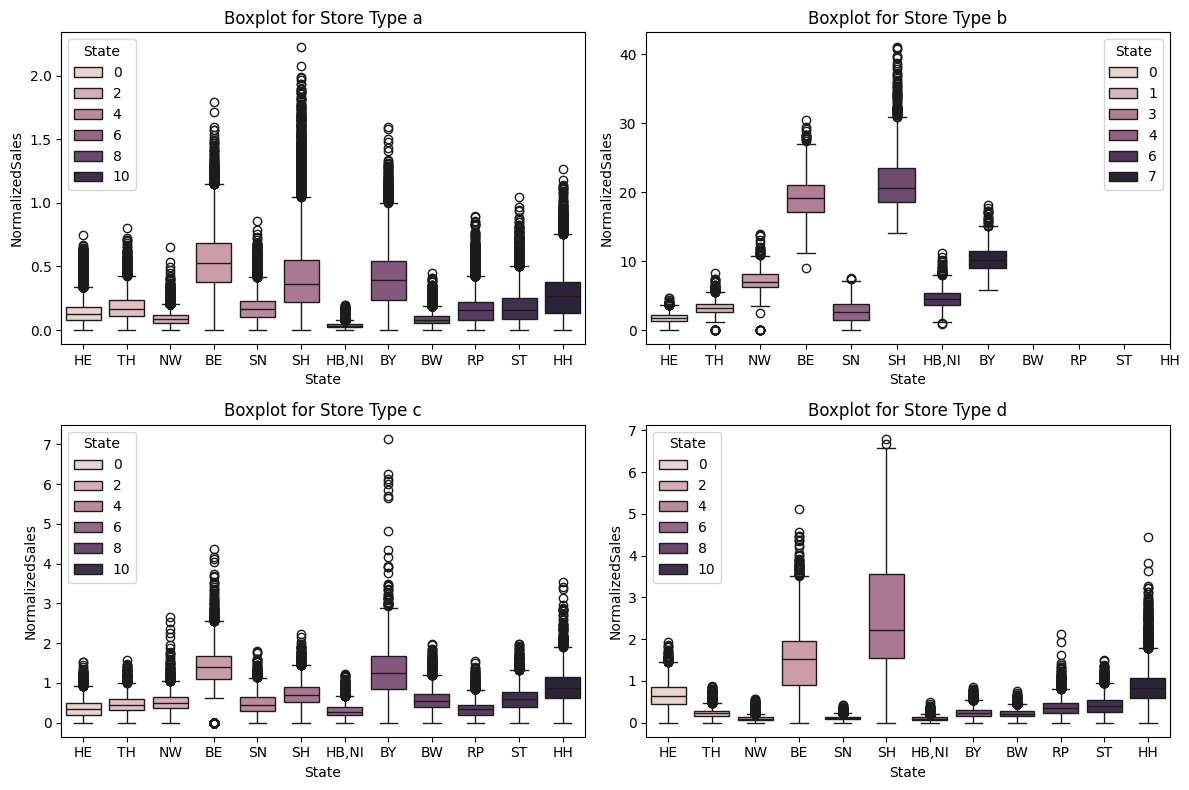

In [19]:
df_raw['NormalizedSales'] = df_raw['Sales'] / df_raw.groupby(['State', 'StoreType'])['Sales'].transform('count')

boxPlotStoreType(df_raw, 'NormalizedSales', storeType, states)

Sklep B jest tylko w co poniektórych landach. Może to wskazywać na pewną ekskluzywność tego typu sklepu. Może być na przykłąd tylko w największych galeriach.

#### OLS

In [20]:
model_store_type_1 = ols('NormalizedSales ~ C(StoreType) + C(State) + 1', data=df_raw)
res1 = model_store_type_1.fit()
print(res1.summary())
# plot(df_raw, res1, 'StoreType', 'NormalizedSales')

                            OLS Regression Results                            
Dep. Variable:        NormalizedSales   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                 6.547e+04
Date:                Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                        02:42:05   Log-Likelihood:            -1.1789e+06
No. Observations:             1017209   AIC:                         2.358e+06
Df Residuals:                 1017194   BIC:                         2.358e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0502      0.00

Dopasowanie do danych na poziomie 47.4%

#### Błąd predykcji

<function matplotlib.pyplot.show(close=None, block=None)>

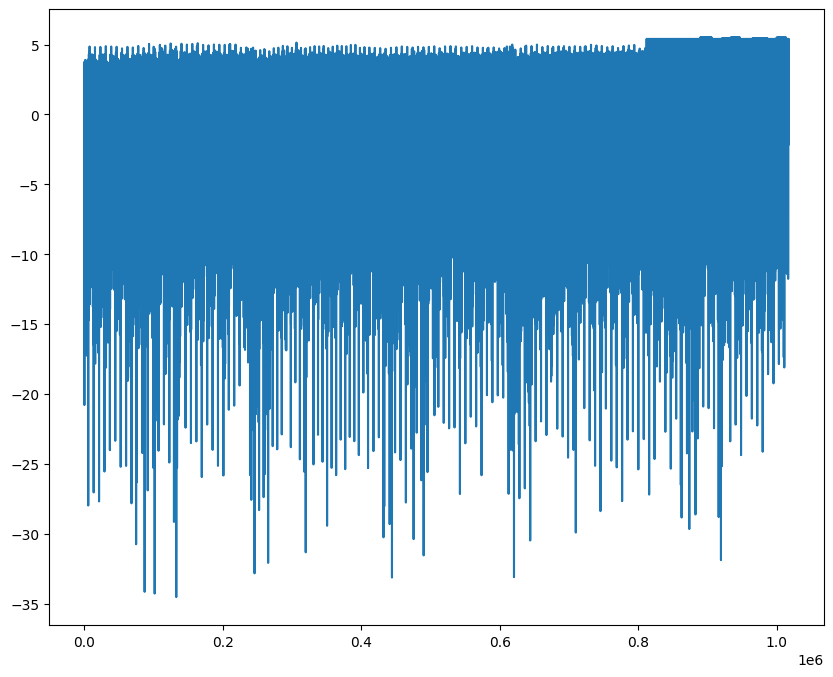

In [21]:
plt.figure(figsize=(10, 8))
err_sales_type_store = res1.predict(df_raw)- df_raw['NormalizedSales']
err_sales_type_store.plot()
plt.show

In [22]:
tTest(df_raw, store_types, 'StoreType', 'NormalizedSales')

Porównanie między 2 a 0:
Statystyka testowa: 327.70003952958854
Wartość p: 0.0
Odrzucamy H0 na poziomie istotności 0.05. Istnieje istotna różnica między grupami.


Porównanie między 2 a 3:
Statystyka testowa: 214.5783311282481
Wartość p: 0.0
Odrzucamy H0 na poziomie istotności 0.05. Istnieje istotna różnica między grupami.


Porównanie między 2 a 1:
Statystyka testowa: -104.73507277576422
Wartość p: 0.0
Odrzucamy H0 na poziomie istotności 0.05. Istnieje istotna różnica między grupami.


Porównanie między 0 a 3:
Statystyka testowa: -143.69935086973524
Wartość p: 0.0
Odrzucamy H0 na poziomie istotności 0.05. Istnieje istotna różnica między grupami.


Porównanie między 0 a 1:
Statystyka testowa: -112.03623175512753
Wartość p: 0.0
Odrzucamy H0 na poziomie istotności 0.05. Istnieje istotna różnica między grupami.


Porównanie między 3 a 1:
Statystyka testowa: -110.14173585382504
Wartość p: 0.0
Odrzucamy H0 na poziomie istotności 0.05. Istnieje istotna różnica między grupami.




p_value na poziomie 0 wkazuje na odrzucenie hipotezy H0

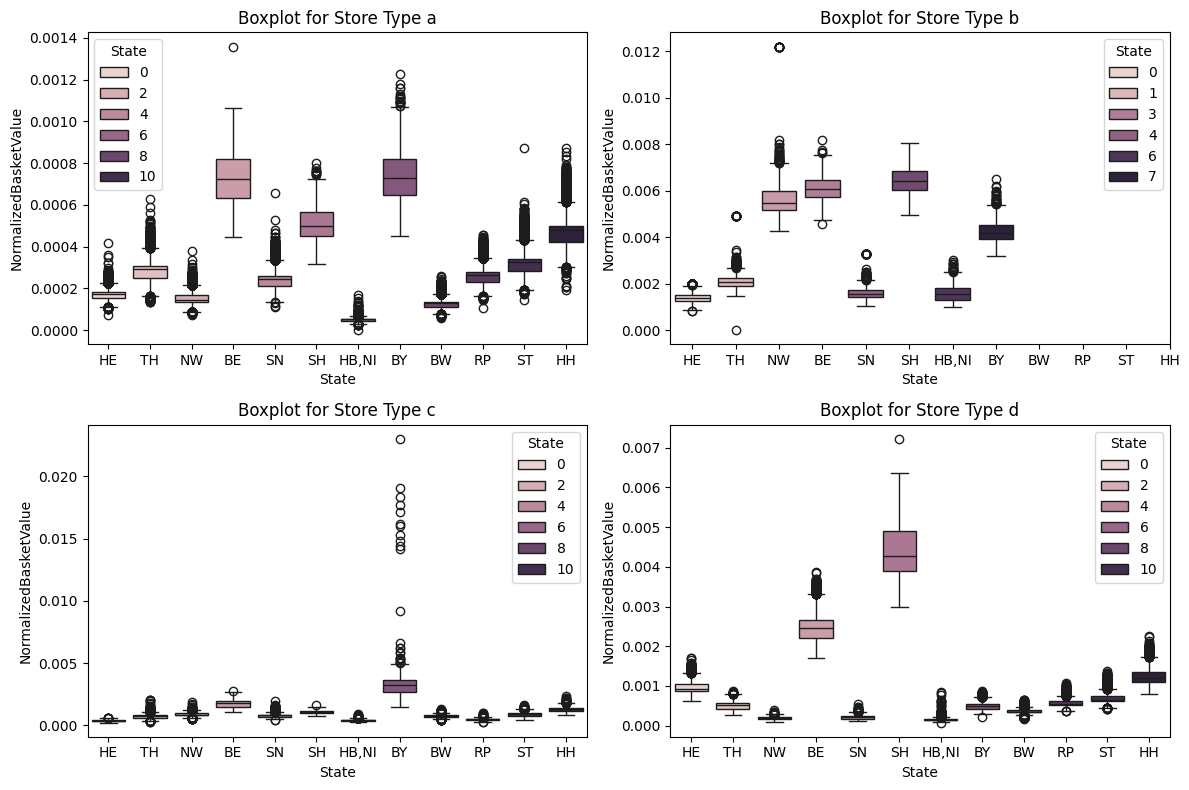

In [23]:
df_raw['NormalizedBasketValue'] = df_raw['BasketValue'] / df_raw.groupby(['State', 'StoreType'])['BasketValue'].transform('count')

boxPlotStoreType(df_raw, 'NormalizedBasketValue', storeType, states)

In [24]:
model_store_type_2 = ols('NormalizedBasketValue ~ C(StoreType) + 1', data=df_raw)
res2 = model_store_type_2.fit()
print(res1.summary())
# plot(df_raw, res2, 'StoreType', 'NormalizedBasketValue')

                            OLS Regression Results                            
Dep. Variable:        NormalizedSales   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                 6.547e+04
Date:                Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                        02:42:12   Log-Likelihood:            -1.1789e+06
No. Observations:             1017209   AIC:                         2.358e+06
Df Residuals:                 1017194   BIC:                         2.358e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0502      0.00

Dopasowanie danych na poziomie 47.4%

#### Błąd predykcji

<function matplotlib.pyplot.show(close=None, block=None)>

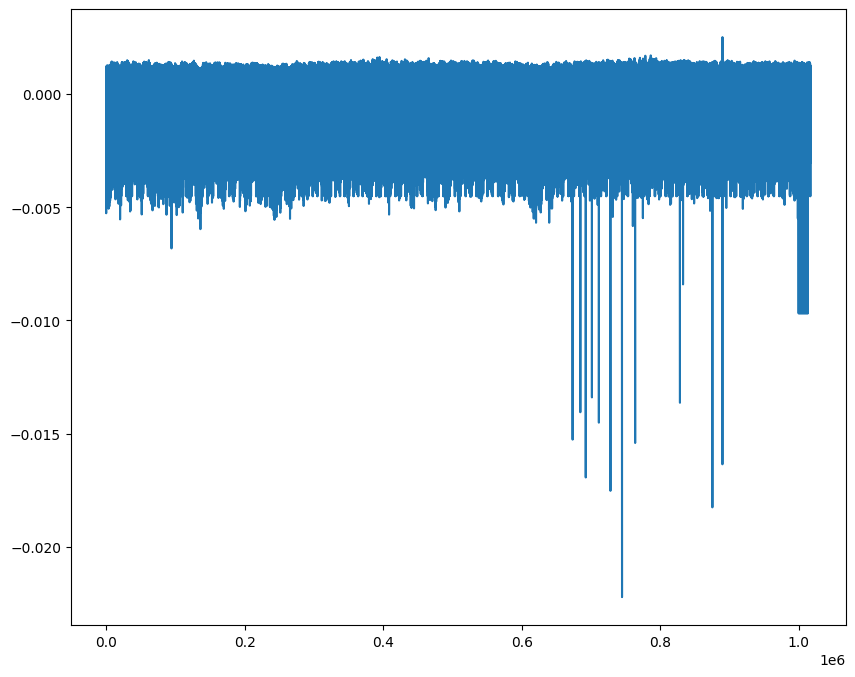

In [25]:
plt.figure(figsize=(10, 8))
err_sales_basket_value = res2.predict(df_raw) - df_raw['NormalizedBasketValue']
err_sales_basket_value.plot()
plt.show

In [26]:
tTest(df_raw, store_types, 'StoreType', 'NormalizedBasketValue')

Porównanie między 2 a 0:
Statystyka testowa: 405.5784805614418
Wartość p: 0.0
Odrzucamy H0 na poziomie istotności 0.05. Istnieje istotna różnica między grupami.


Porównanie między 2 a 3:
Statystyka testowa: 226.26961835100218
Wartość p: 0.0
Odrzucamy H0 na poziomie istotności 0.05. Istnieje istotna różnica między grupami.


Porównanie między 2 a 1:
Statystyka testowa: -121.71719367493168
Wartość p: 0.0
Odrzucamy H0 na poziomie istotności 0.05. Istnieje istotna różnica między grupami.


Porównanie między 0 a 3:
Statystyka testowa: -241.5778386150318
Wartość p: 0.0
Odrzucamy H0 na poziomie istotności 0.05. Istnieje istotna różnica między grupami.


Porównanie między 0 a 1:
Statystyka testowa: -162.68999830774274
Wartość p: 0.0
Odrzucamy H0 na poziomie istotności 0.05. Istnieje istotna różnica między grupami.


Porównanie między 3 a 1:
Statystyka testowa: -147.9141620990916
Wartość p: 0.0
Odrzucamy H0 na poziomie istotności 0.05. Istnieje istotna różnica między grupami.




Również odrzucamy hipoteze H0

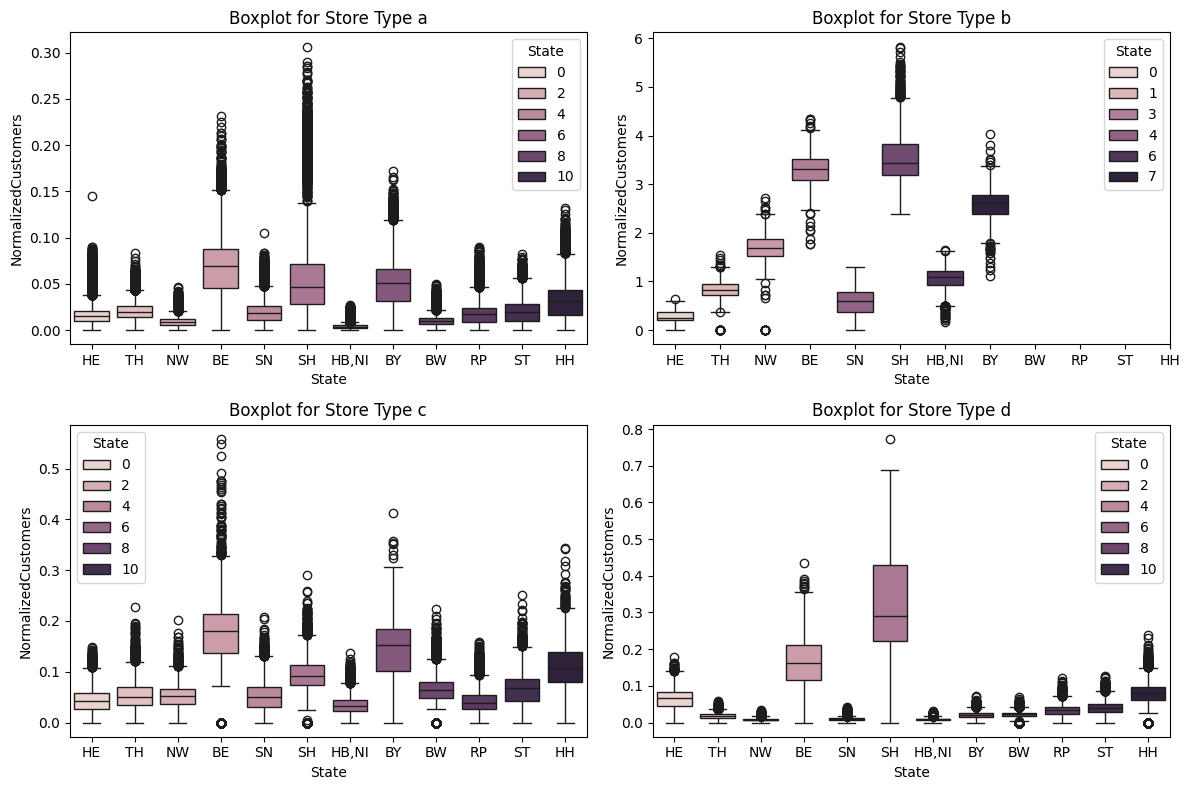

In [27]:
df_raw['NormalizedCustomers'] = df_raw['Customers'] / df_raw.groupby(['State', 'StoreType'])['Customers'].transform('count')

boxPlotStoreType(df_raw, 'NormalizedCustomers', storeType, states)

In [28]:
model_store_type_3 = ols('NormalizedCustomers ~ C(StoreType) + 1', data=df_raw)
res3 = model_store_type_3.fit()
print(res1.summary())
# plot(df_raw, res3, 'StoreType', 'NormalizedCustomers')

                            OLS Regression Results                            
Dep. Variable:        NormalizedSales   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                 6.547e+04
Date:                Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                        02:42:18   Log-Likelihood:            -1.1789e+06
No. Observations:             1017209   AIC:                         2.358e+06
Df Residuals:                 1017194   BIC:                         2.358e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0502      0.00

Dopasowanie danych na poziomie 47.4%

<function matplotlib.pyplot.show(close=None, block=None)>

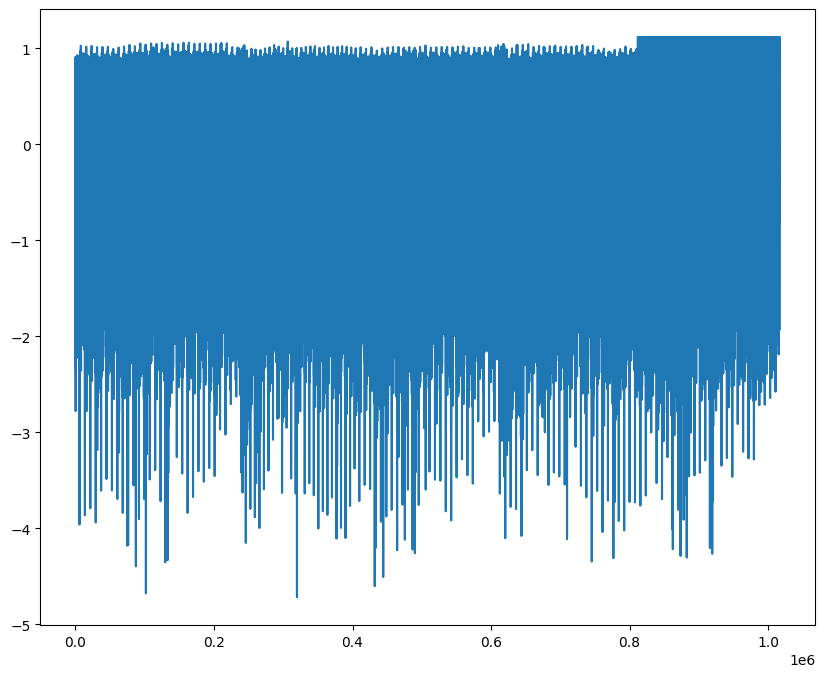

In [29]:
plt.figure(figsize=(10, 8))
err_sales_customers = res3.predict(df_raw) - df_raw['NormalizedCustomers']
err_sales_customers.plot()
plt.show

In [30]:
tTest(df_raw, store_types, 'StoreType', 'NormalizedCustomers')

Porównanie między 2 a 0:
Statystyka testowa: 327.95876717776906
Wartość p: 0.0
Odrzucamy H0 na poziomie istotności 0.05. Istnieje istotna różnica między grupami.


Porównanie między 2 a 3:
Statystyka testowa: 255.59140260164838
Wartość p: 0.0
Odrzucamy H0 na poziomie istotności 0.05. Istnieje istotna różnica między grupami.


Porównanie między 2 a 1:
Statystyka testowa: -125.05760242349595
Wartość p: 0.0
Odrzucamy H0 na poziomie istotności 0.05. Istnieje istotna różnica między grupami.


Porównanie między 0 a 3:
Statystyka testowa: -84.91159349276566
Wartość p: 0.0
Odrzucamy H0 na poziomie istotności 0.05. Istnieje istotna różnica między grupami.


Porównanie między 0 a 1:
Statystyka testowa: -130.03595800035603
Wartość p: 0.0
Odrzucamy H0 na poziomie istotności 0.05. Istnieje istotna różnica między grupami.


Porównanie między 3 a 1:
Statystyka testowa: -129.33369474608963
Wartość p: 0.0
Odrzucamy H0 na poziomie istotności 0.05. Istnieje istotna różnica między grupami.




Odrzucamy H0

#### 4.3.2. Dni wolne od nauki szkolnej

Ilość dni wolnych

In [31]:
print(df_raw['SchoolHoliday'].value_counts())
print(f'Percentage of School Holidays: {df_raw["SchoolHoliday"].mean()*100:.2f}%')

0    835488
1    181721
Name: SchoolHoliday, dtype: int64
Percentage of School Holidays: 17.86%


#### Boxploty

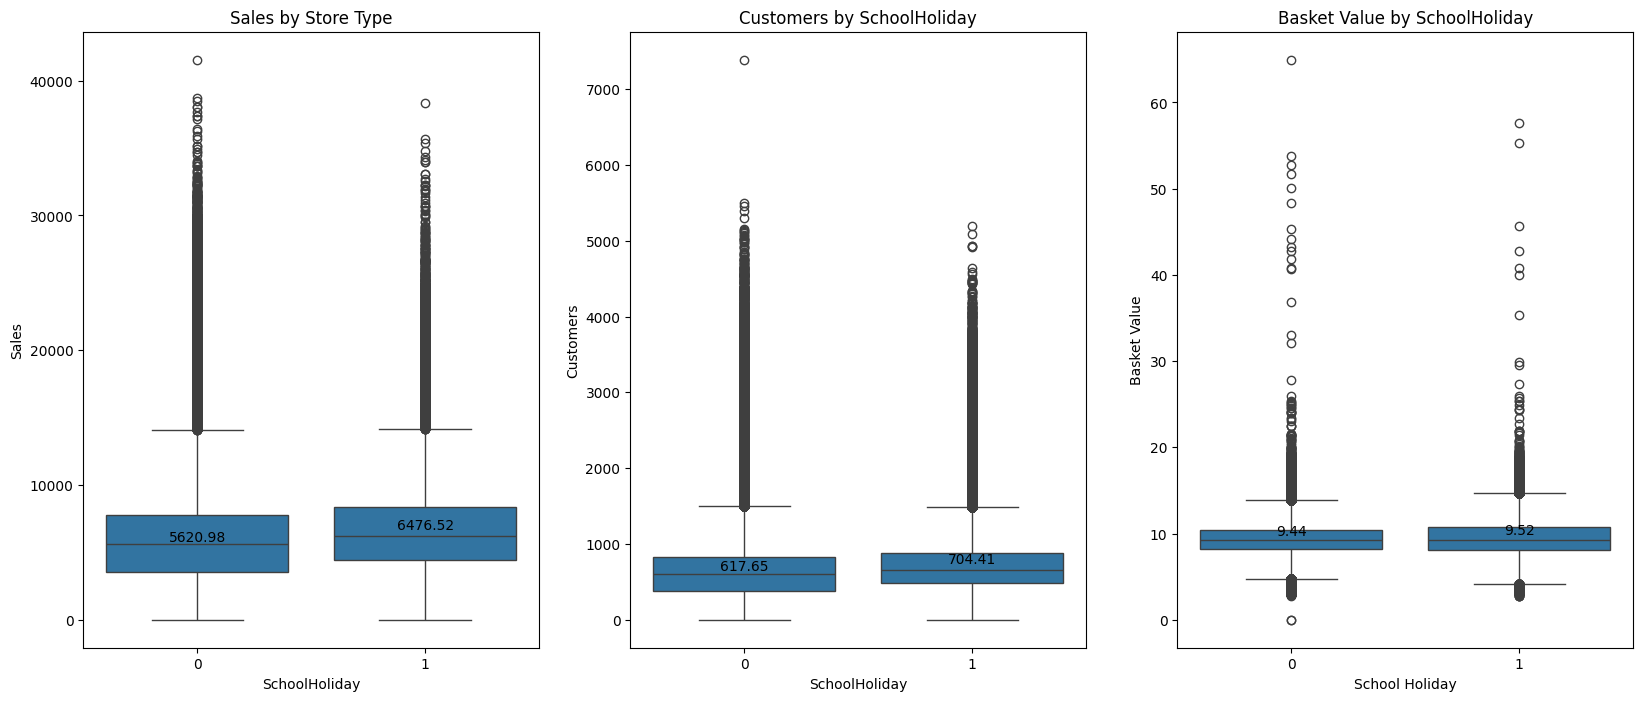

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.boxplot(x='SchoolHoliday', y='Sales', data=df_raw, ax=ax[0])
ax[0].set_title('Sales by Store Type')
ax[0].set_xlabel('SchoolHoliday')
ax[0].set_ylabel('Sales')

mean_sales_value = df_raw.groupby('SchoolHoliday')['Sales'].mean()
for i, mean in enumerate(mean_sales_value):
    ax[0].text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

sns.boxplot(x='SchoolHoliday', y='Customers', data=df_raw, ax=ax[1])
ax[1].set_title('Customers by SchoolHoliday')
ax[1].set_xlabel('SchoolHoliday')
ax[1].set_ylabel('Customers')

mean_customers_value = df_raw.groupby('SchoolHoliday')['Customers'].mean()
for i, mean in enumerate(mean_customers_value):
    ax[1].text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

sns.boxplot(x='SchoolHoliday', y='BasketValue', data=df_raw, ax=ax[2])
ax[2].set_title('Basket Value by SchoolHoliday')
ax[2].set_xlabel('School Holiday')
ax[2].set_ylabel('Basket Value')

mean_basket_value = df_raw.groupby('SchoolHoliday')['BasketValue'].mean()
for i, mean in enumerate(mean_basket_value):
    ax[2].text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

plt.show()


#### Boxploty z podziałem na stany, znormalizowane

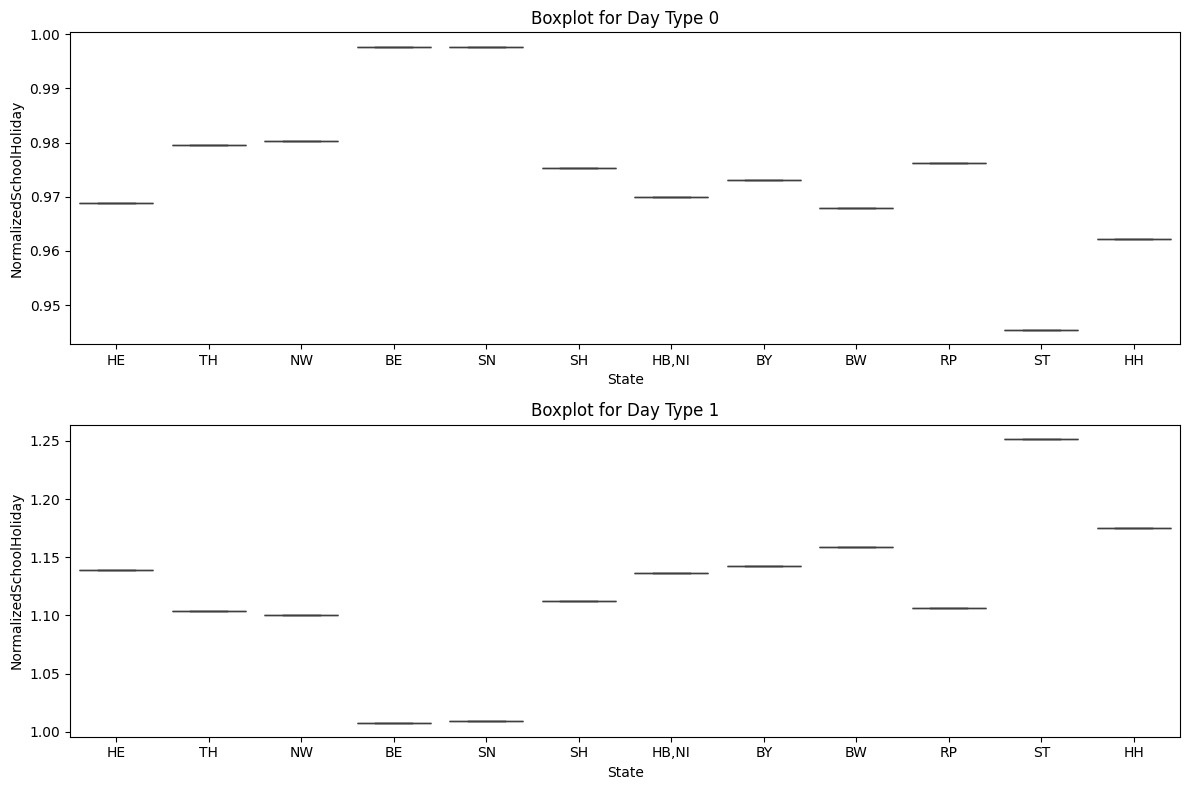

In [33]:
df_raw['NormalizedSchoolHoliday'] = df_raw.groupby(['SchoolHoliday', 'State'])['Sales'].transform('mean') / df_raw.groupby(['State'])['Sales'].transform('mean')

boxPlotSchoolHoliday(df_raw, 'NormalizedSchoolHoliday', states)

#### OLS

In [34]:
model_sales_school_holiday = ols('NormalizedSchoolHoliday ~ C(SchoolHoliday) + C(State) + 1', data=df_raw)
res_sales_school_holiday = model_sales_school_holiday.fit()
print(res_sales_school_holiday.summary())
# plot(df_raw, res_sales_school_holiday, 'SchoolHoliday', 'NormalizedSchoolHoliday')

                               OLS Regression Results                              
Dep. Variable:     NormalizedSchoolHoliday   R-squared:                       0.823
Model:                                 OLS   Adj. R-squared:                  0.823
Method:                      Least Squares   F-statistic:                 3.930e+05
Date:                     Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                             02:42:29   Log-Likelihood:             2.2790e+06
No. Observations:                  1017209   AIC:                        -4.558e+06
Df Residuals:                      1017196   BIC:                        -4.558e+06
Df Model:                               12                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

Wytłumaczenie danych na poziomie 82.3%

#### Błąd predykcji

<function matplotlib.pyplot.show(close=None, block=None)>

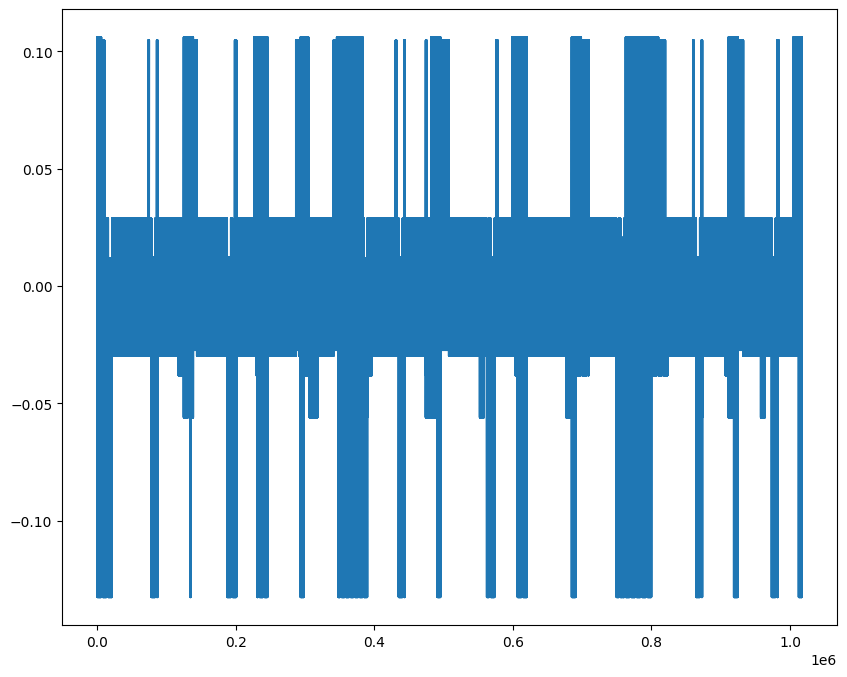

In [35]:
plt.figure(figsize=(10, 8))
err_sales_school_holiday = res_sales_school_holiday.predict(df_raw) - df_raw['NormalizedSchoolHoliday']
err_sales_school_holiday.plot()
plt.show

#### Normalizacja

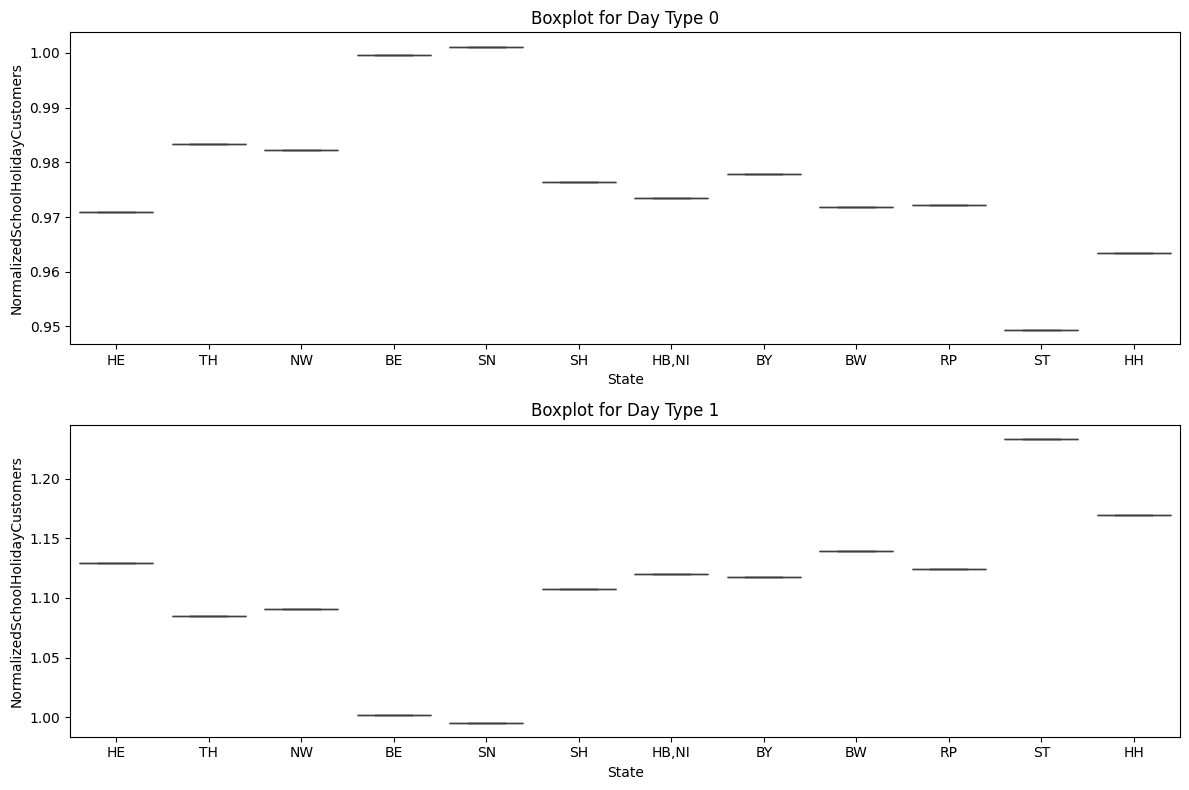

In [36]:
df_raw['NormalizedSchoolHolidayCustomers'] = df_raw.groupby(['SchoolHoliday', 'State'])['Customers'].transform('mean') / df_raw.groupby(['State'])['Customers'].transform('mean')

boxPlotSchoolHoliday(df_raw, 'NormalizedSchoolHolidayCustomers', states)

#### OLS

In [37]:
model_customers_school_holiday = ols('NormalizedSchoolHolidayCustomers ~ C(SchoolHoliday) + C(State) + 1', data=df_raw)
res_customers_school_holiday = model_customers_school_holiday.fit()
print(res_customers_school_holiday.summary())
# plot(df_raw, res_customers_school_holiday, 'SchoolHoliday', 'NormalizedSchoolHolidayCustomers')

                                   OLS Regression Results                                   
Dep. Variable:     NormalizedSchoolHolidayCustomers   R-squared:                       0.794
Model:                                          OLS   Adj. R-squared:                  0.794
Method:                               Least Squares   F-statistic:                 3.273e+05
Date:                              Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                                      02:42:37   Log-Likelihood:             2.2954e+06
No. Observations:                           1017209   AIC:                        -4.591e+06
Df Residuals:                               1017196   BIC:                        -4.591e+06
Df Model:                                        12                                         
Covariance Type:                          nonrobust                                         
                            coef    std err          t      P>|t|     

Wytłumaczenie danych na poziomie 79.4%, niskie p_value

#### Błąd predykcji modelu

<function matplotlib.pyplot.show(close=None, block=None)>

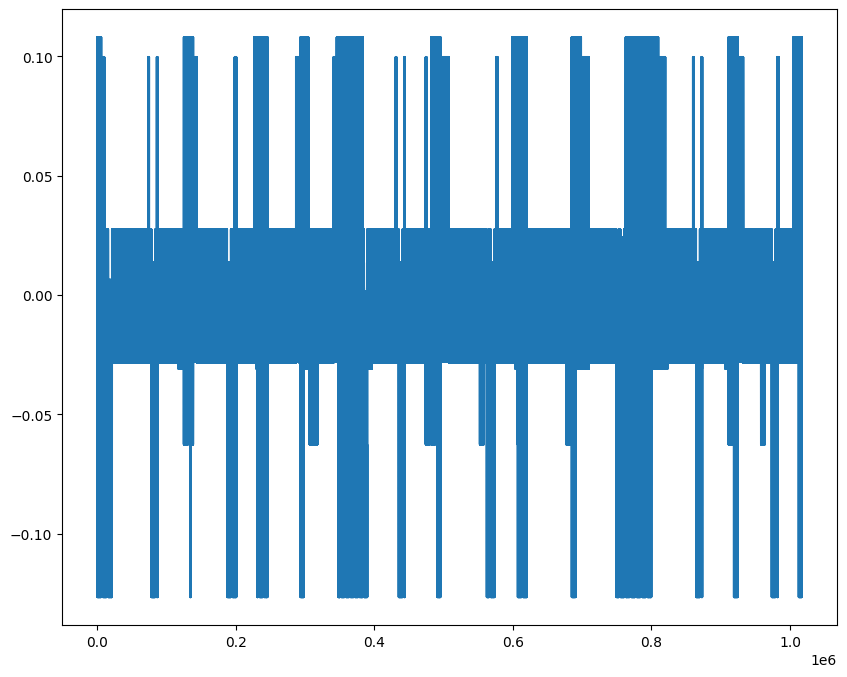

In [38]:
plt.figure(figsize=(10, 8))
err_customers_school_holiday = res_customers_school_holiday.predict(df_raw) - df_raw['NormalizedSchoolHolidayCustomers']
err_customers_school_holiday.plot()
plt.show

#### Testy A/B dla sprzedaży

In [39]:
store_types = df_raw['SchoolHoliday'].unique()

ABtests(df_raw, store_types, 'SchoolHoliday', 'Sales')

Porównanie między 1 a 0:
Statystyka testowa: 855.54317
Wartość p: 0.0198
Odrzucamy H0 na poziomie istotności 0.05. Istnieje istotna różnica między grupami.




#### Testy A/B dla odwiedzających

In [40]:
ABtests(df_raw, store_types, 'SchoolHoliday', 'Customers')

Porównanie między 1 a 0:
Statystyka testowa: 86.76777
Wartość p: 0.0198
Odrzucamy H0 na poziomie istotności 0.05. Istnieje istotna różnica między grupami.




#### Testy A/B dla wartość koszyka

In [41]:
ABtests(df_raw, store_types, 'SchoolHoliday', 'BasketValue')

Porównanie między 1 a 0:
Statystyka testowa: 0.08537
Wartość p: 0.0198
Odrzucamy H0 na poziomie istotności 0.05. Istnieje istotna różnica między grupami.




#### 4.3.3. Dni tygodnia (pracujące) i weekendy

In [42]:
day_types = df_raw['DayOfWeek'].unique()
print(day_types)
df_raw['DayOfWeek'].value_counts()

[4 3 2 1 0 6 5]


4    145845
3    145845
2    145665
1    145664
0    144730
6    144730
5    144730
Name: DayOfWeek, dtype: int64

#### Boxploty

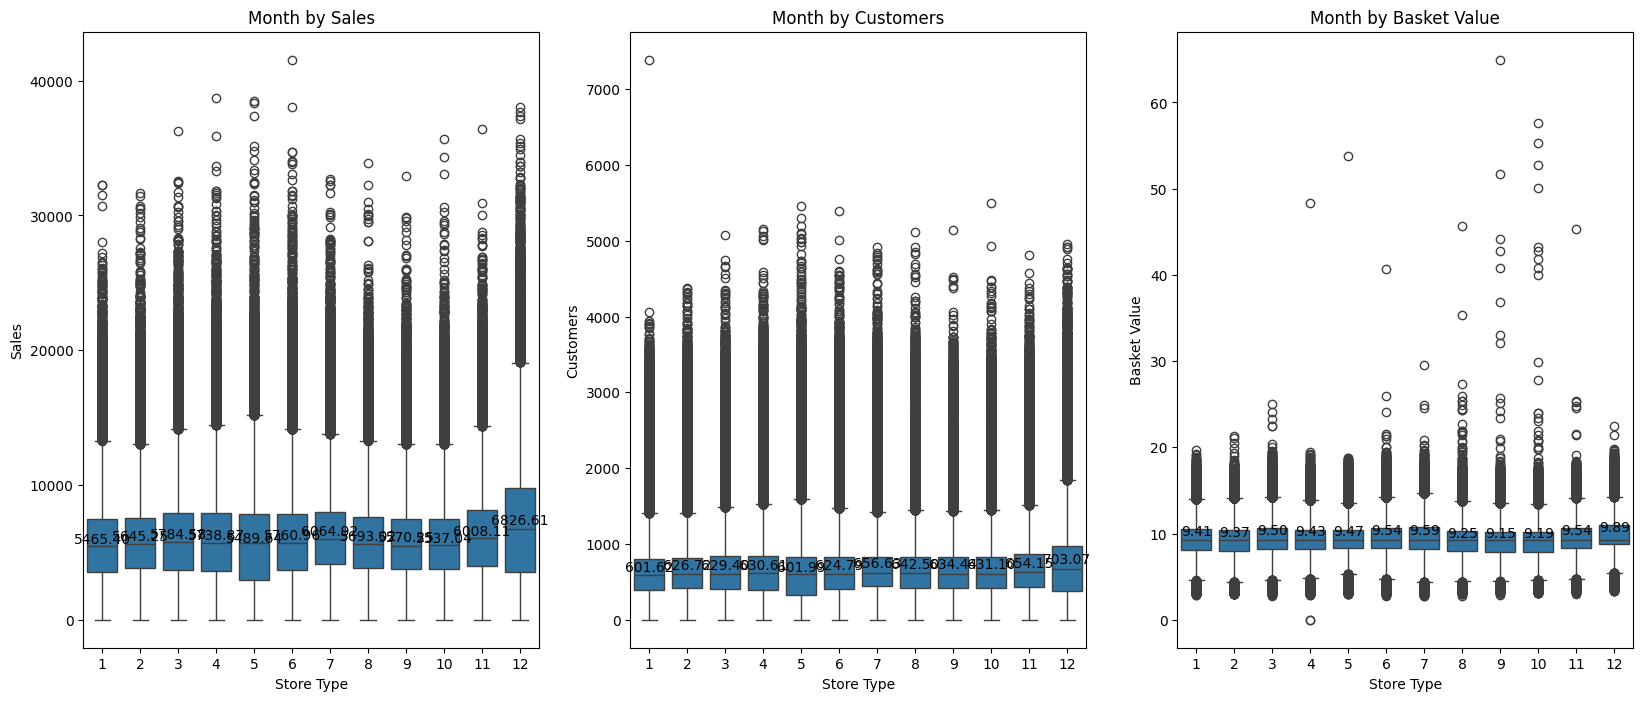

In [43]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.boxplot(x='Month', y='Sales', data=df_raw, ax=ax[0])
ax[0].set_title('Month by Sales')
ax[0].set_xlabel('Store Type')
ax[0].set_ylabel('Sales')


mean_sales = df_raw.groupby('Month')['Sales'].mean()
for i, mean in enumerate(mean_sales):
    ax[0].text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

sns.boxplot(x='Month', y='Customers', data=df_raw, ax=ax[1])
ax[1].set_title('Month by Customers')
ax[1].set_xlabel('Store Type')
ax[1].set_ylabel('Customers')


mean_customers = df_raw.groupby('Month')['Customers'].mean()
for i, mean in enumerate(mean_customers):
    ax[1].text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

sns.boxplot(x='Month', y='BasketValue', data=df_raw, ax=ax[2])
ax[2].set_title('Month by Basket Value')
ax[2].set_xlabel('Store Type')
ax[2].set_ylabel('Basket Value')


mean_basket_value = df_raw.groupby('Month')['BasketValue'].mean()
for i, mean in enumerate(mean_basket_value):
    ax[2].text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

plt.show()

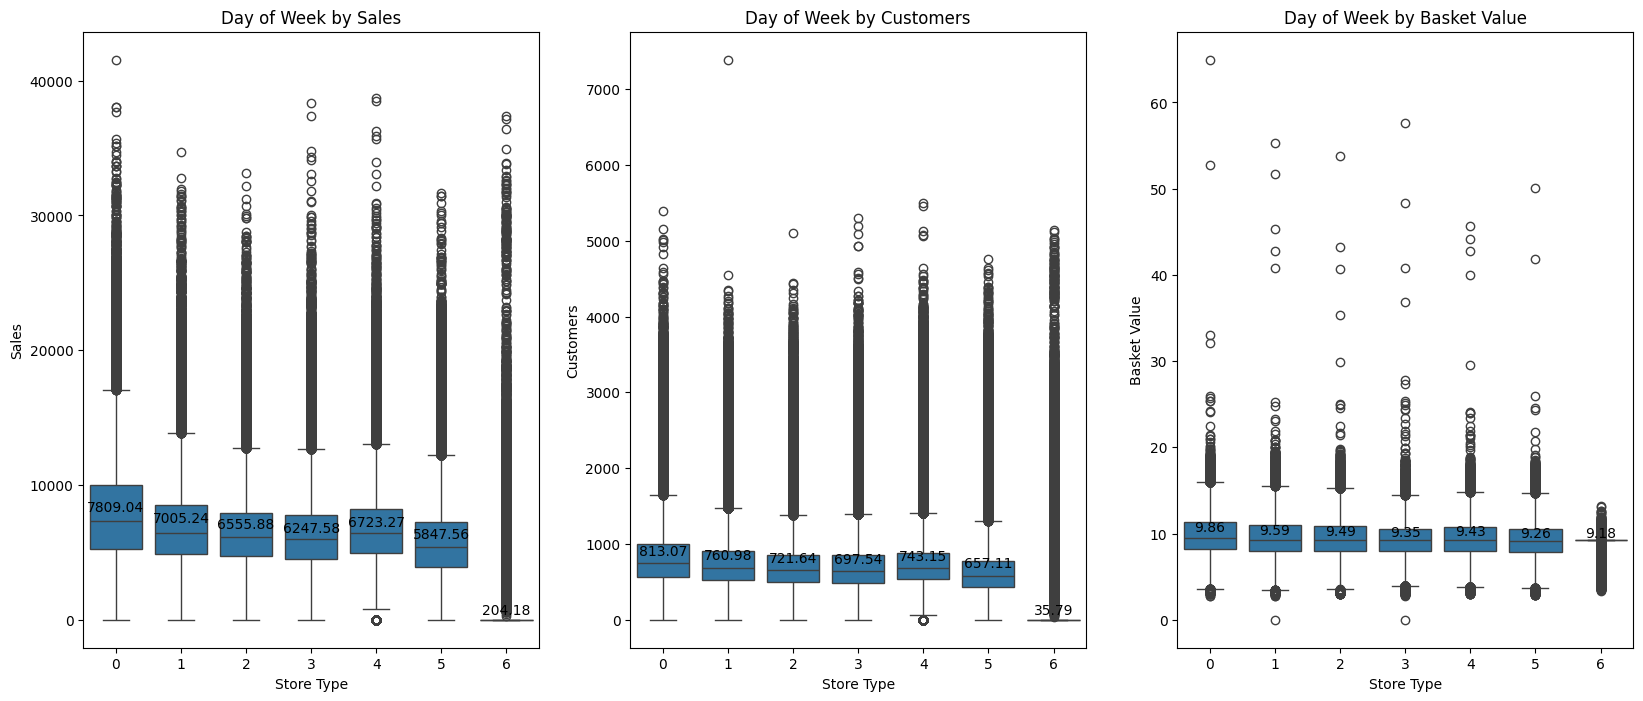

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.boxplot(x='DayOfWeek', y='Sales', data=df_raw, ax=ax[0])
ax[0].set_title('Day of Week by Sales')
ax[0].set_xlabel('Store Type')
ax[0].set_ylabel('Sales')


mean_sales = df_raw.groupby('DayOfWeek')['Sales'].mean()
for i, mean in enumerate(mean_sales):
    ax[0].text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

sns.boxplot(x='DayOfWeek', y='Customers', data=df_raw, ax=ax[1])
ax[1].set_title('Day of Week by Customers')
ax[1].set_xlabel('Store Type')
ax[1].set_ylabel('Customers')


mean_customers = df_raw.groupby('DayOfWeek')['Customers'].mean()
for i, mean in enumerate(mean_customers):
    ax[1].text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

sns.boxplot(x='DayOfWeek', y='BasketValue', data=df_raw, ax=ax[2])
ax[2].set_title('Day of Week by Basket Value')
ax[2].set_xlabel('Store Type')
ax[2].set_ylabel('Basket Value')


mean_basket_value = df_raw.groupby('DayOfWeek')['BasketValue'].mean()
for i, mean in enumerate(mean_basket_value):
    ax[2].text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

plt.show()

#### Box ploty z podziałem na miesiąc i landy

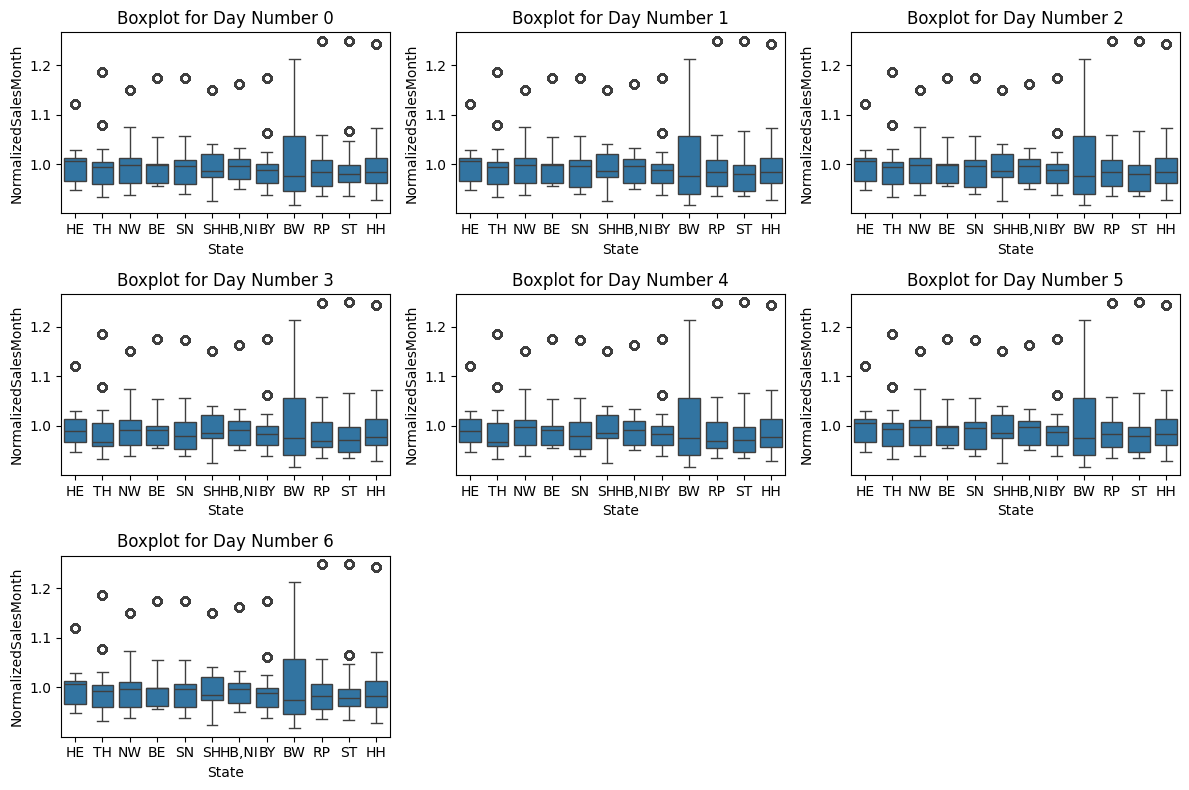

In [45]:
df_raw['NormalizedSalesMonth'] = df_raw.groupby(['Month', 'State'])['Sales'].transform('mean') / df_raw.groupby(['State'])['Sales'].transform('mean')

boxPlotDay(df_raw, 'NormalizedSalesMonth', states)

In [46]:
model_month = ols('NormalizedSalesMonth ~ C(Month) + C(State) + 1', data=df_raw)
res_month = model_month.fit()
print(res_month.summary())
# plot(df_raw, res_month, 'Month', 'NormalizedSalesMonth')

                             OLS Regression Results                             
Dep. Variable:     NormalizedSalesMonth   R-squared:                       0.911
Model:                              OLS   Adj. R-squared:                  0.911
Method:                   Least Squares   F-statistic:                 4.761e+05
Date:                  Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                          02:43:01   Log-Likelihood:             2.6731e+06
No. Observations:               1017209   AIC:                        -5.346e+06
Df Residuals:                   1017186   BIC:                        -5.346e+06
Df Model:                            22                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.947

Bardzo dobry wynik dopasowania modelu do danych na poziomie 91.1%

#### Błąd predykcji

<function matplotlib.pyplot.show(close=None, block=None)>

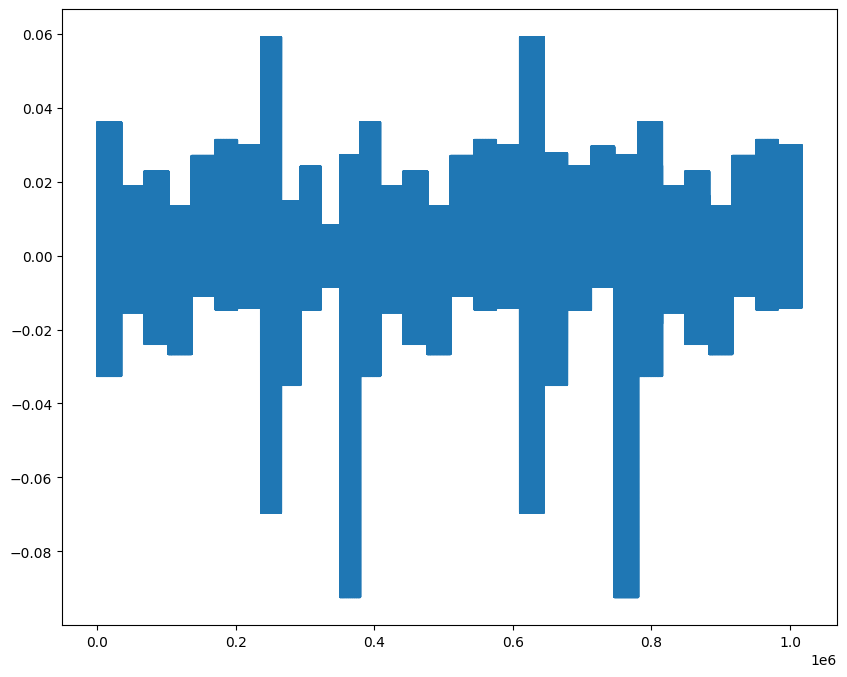

In [47]:
plt.figure(figsize=(10, 8))
err_month = res_month.predict(df_raw) - df_raw['NormalizedSalesMonth']
err_month.plot()
plt.show

Odsprzęganie danych aby pozbyć się wolnozmieniających się zależności

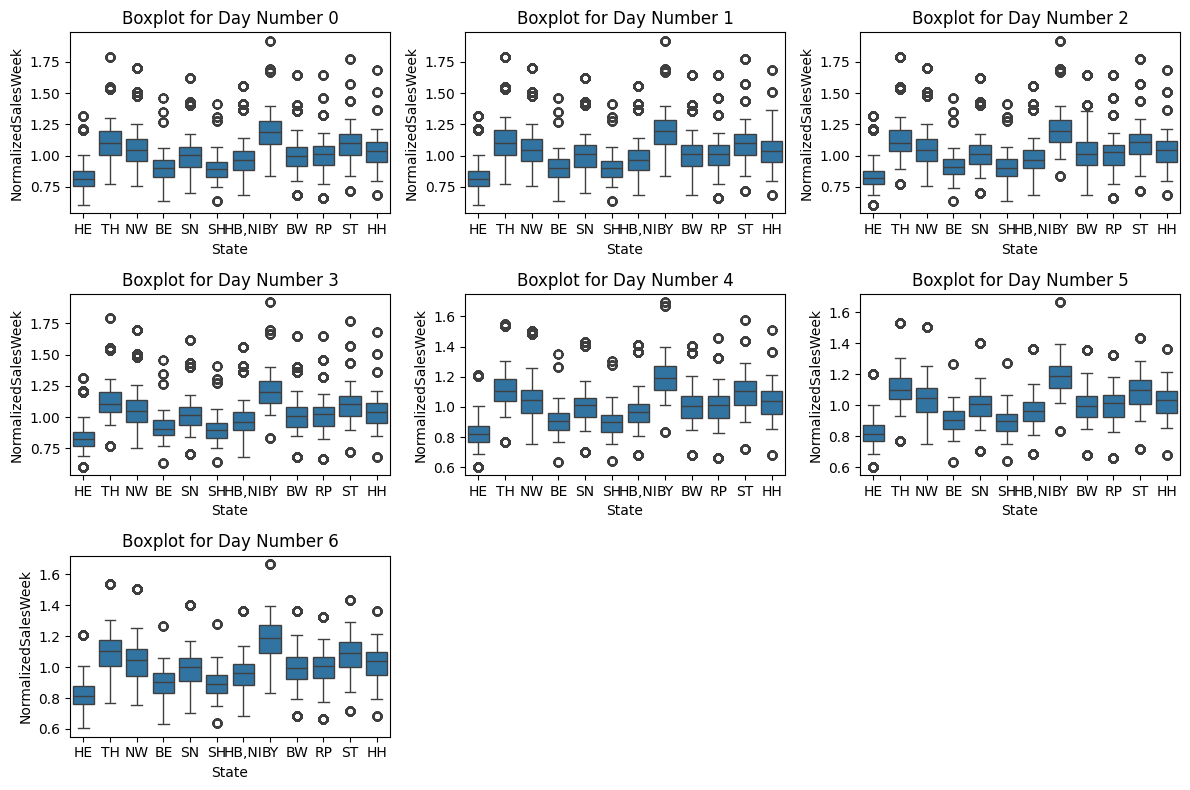

In [48]:
df_raw['NormalizedSalesWeek'] = df_raw.groupby(['WeekOfMonth', 'Month'])['Sales'].transform('mean') / df_raw.groupby(['State', 'Month'])['Sales'].transform('mean')

boxPlotDay(df_raw, 'NormalizedSalesWeek', states)

#### OLS

In [49]:
model_week = ols('NormalizedSalesWeek ~ C(WeekOfMonth) + C(State) + 1', data=df_raw)
res_week = model_week.fit()
print(res_week.summary())
# plot(df_raw, res_week, 'WeekOfMonth', 'NormalizedSalesWeek')

                             OLS Regression Results                            
Dep. Variable:     NormalizedSalesWeek   R-squared:                       0.463
Model:                             OLS   Adj. R-squared:                  0.463
Method:                  Least Squares   F-statistic:                 5.847e+04
Date:                 Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                         02:43:10   Log-Likelihood:             8.0201e+05
No. Observations:              1017209   AIC:                        -1.604e+06
Df Residuals:                  1017193   BIC:                        -1.604e+06
Df Model:                           15                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               

Dopasowanie modelu do danych na poziomie 46.3%

Błąd predykcji modelu multiplikatywnego

<function matplotlib.pyplot.show(close=None, block=None)>

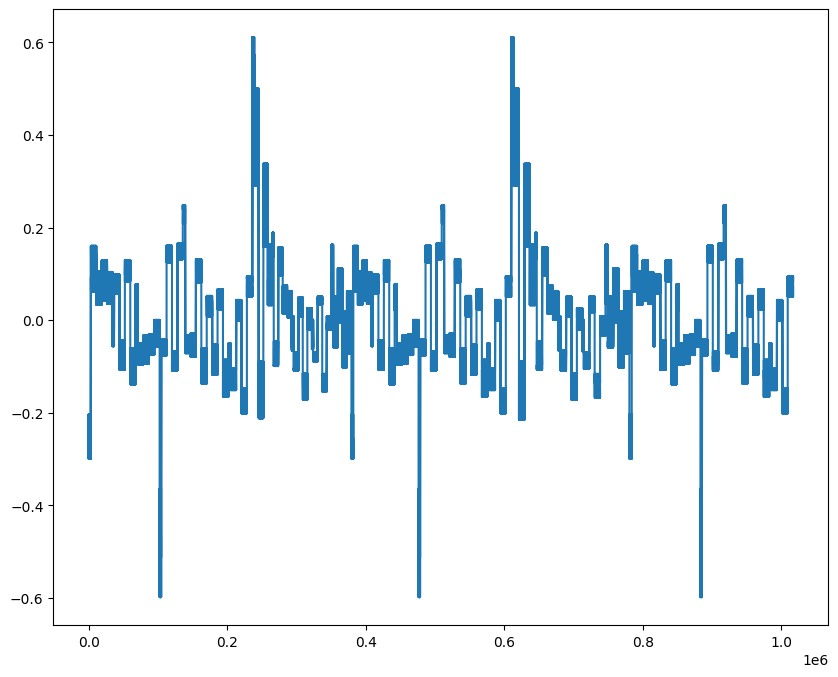

In [50]:
plt.figure(figsize=(10, 8))
err_week = res_week.predict(df_raw) * res_month.predict(df_raw) - df_raw['NormalizedSalesWeek']
err_week.plot()
plt.show

Odsprzęgnięcie wolno zmieniającego się sygnału z zakresu tygodniowego

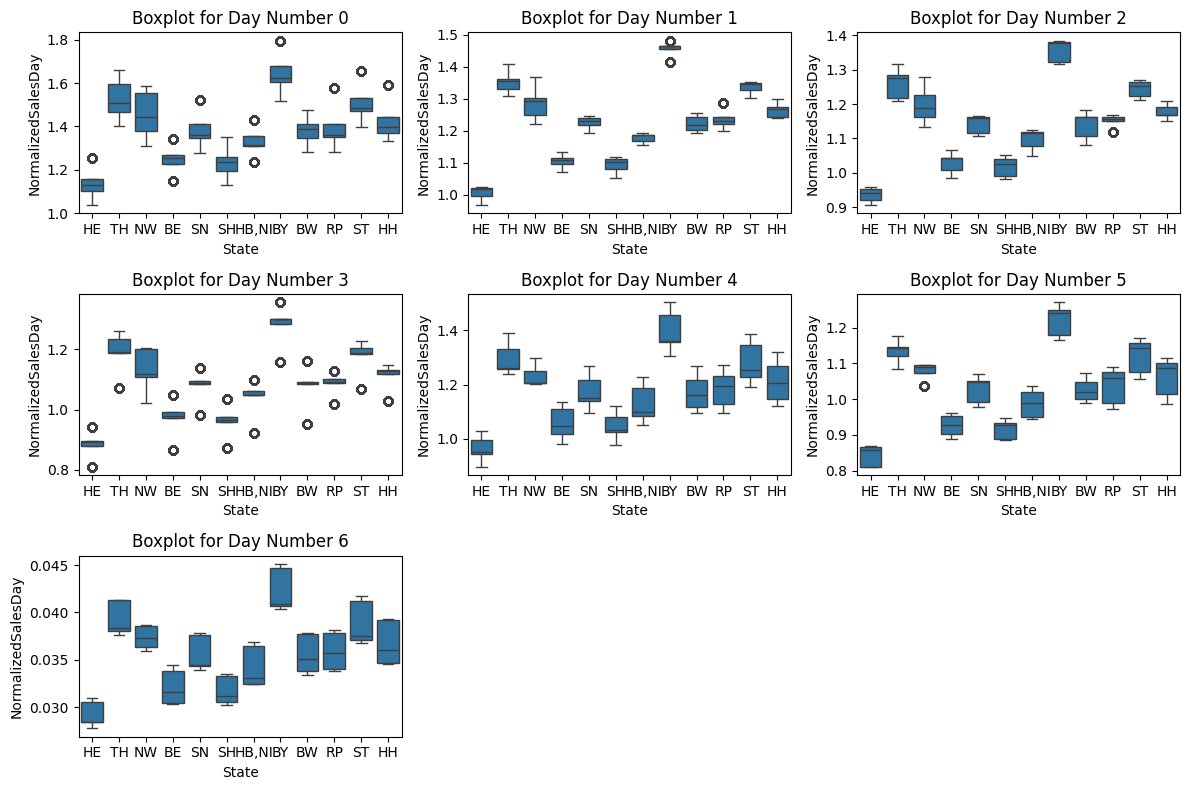

In [51]:
df_raw['NormalizedSalesDay'] = df_raw.groupby(['DayOfWeek', 'WeekOfMonth'])['Sales'].transform('mean') / df_raw.groupby(['State', 'WeekOfMonth'])['Sales'].transform('mean')

boxPlotDay(df_raw, 'NormalizedSalesDay', states)

#### OLS

In [52]:
model_day = ols('NormalizedSalesDay ~ C(DayOfWeek) + C(State) + 1', data=df_raw)
res_day = model_day.fit()
print(res_day.summary())
# plot(df_raw, res_day, 'DayOfWeek', 'NormalizedSalesDay')

                            OLS Regression Results                            
Dep. Variable:     NormalizedSalesDay   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 3.397e+06
Date:                Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                        02:43:22   Log-Likelihood:             1.5043e+06
No. Observations:             1017209   AIC:                        -3.009e+06
Df Residuals:                 1017191   BIC:                        -3.008e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.1795      0.00

Bardzo dobra wytłumaczalność danych (na poziomie 98.3%) uzyskana poprzez zastosowanie modelu multiplikatywnego

#### Błąd predykcji

<function matplotlib.pyplot.show(close=None, block=None)>

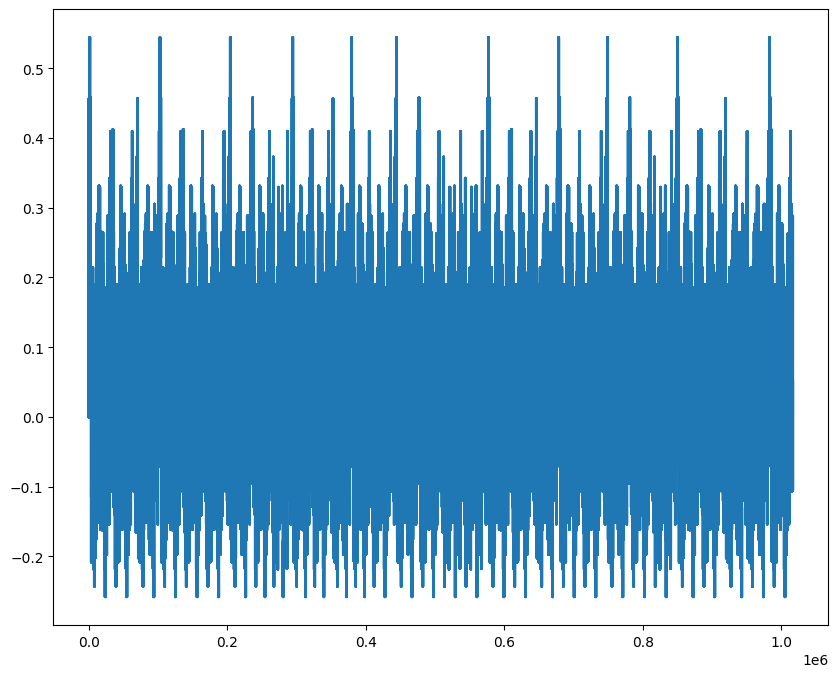

In [53]:
plt.figure(figsize=(10, 8))
err_day = res_day.predict(df_raw) * res_week.predict(df_raw) - df_raw['NormalizedSalesDay']
err_day.plot()
plt.show

## 4.3.4 Trwanie promocji

#### Ilość promocji

In [54]:
print(df_raw['Promo'].unique())

df_raw['Promo'].value_counts()

[1 0]


0    629129
1    388080
Name: Promo, dtype: int64

#### Boxploty

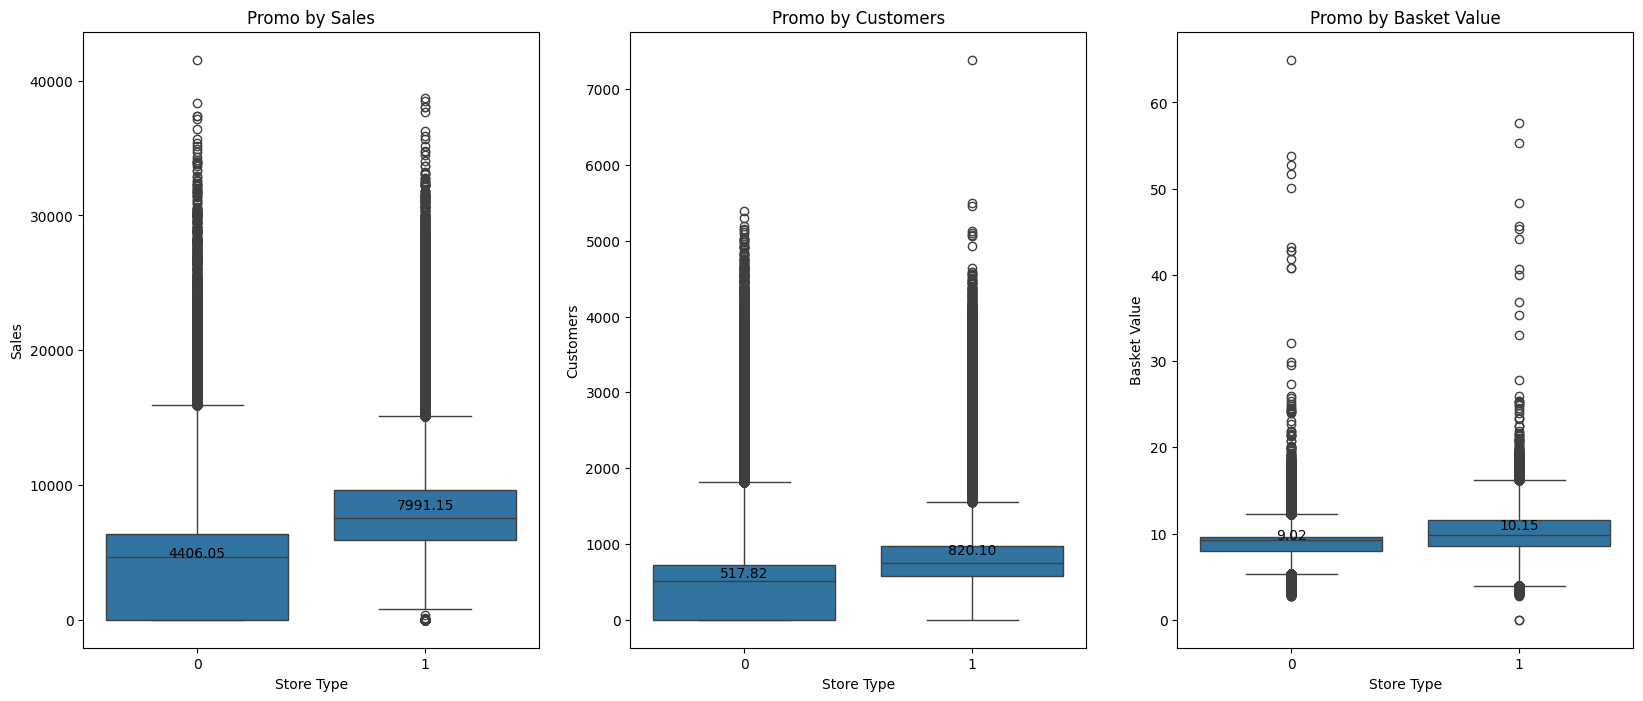

In [55]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.boxplot(x='Promo', y='Sales', data=df_raw, ax=ax[0])
ax[0].set_title('Promo by Sales')
ax[0].set_xlabel('Store Type')
ax[0].set_ylabel('Sales')


mean_sales = df_raw.groupby('Promo')['Sales'].mean()
for i, mean in enumerate(mean_sales):
    ax[0].text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

sns.boxplot(x='Promo', y='Customers', data=df_raw, ax=ax[1])
ax[1].set_title('Promo by Customers')
ax[1].set_xlabel('Store Type')
ax[1].set_ylabel('Customers')


mean_customers = df_raw.groupby('Promo')['Customers'].mean()
for i, mean in enumerate(mean_customers):
    ax[1].text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

sns.boxplot(x='Promo', y='BasketValue', data=df_raw, ax=ax[2])
ax[2].set_title('Promo by Basket Value')
ax[2].set_xlabel('Store Type')
ax[2].set_ylabel('Basket Value')


mean_basket_value = df_raw.groupby('Promo')['BasketValue'].mean()
for i, mean in enumerate(mean_basket_value):
    ax[2].text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

plt.show()

#### Normalizacja danych

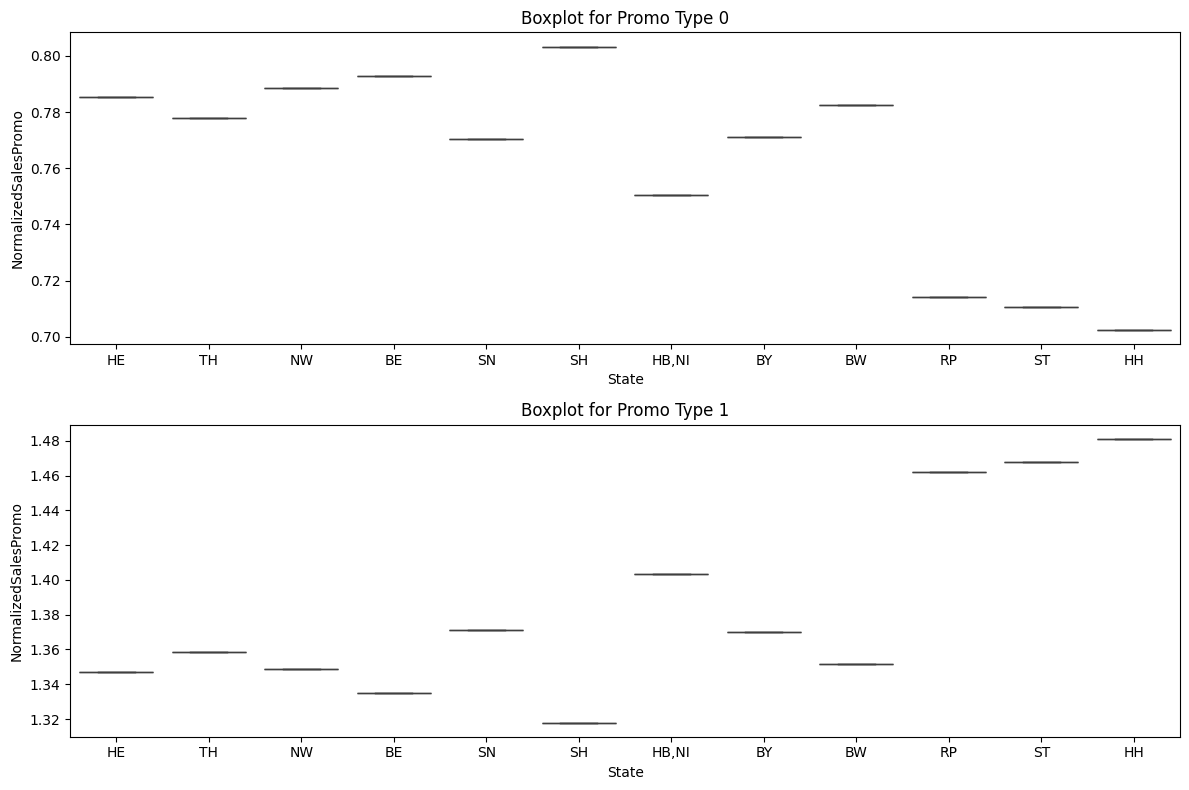

In [56]:
df_raw['NormalizedSalesPromo'] = df_raw.groupby(['Promo', 'State'])['Sales'].transform('mean') / df_raw.groupby(['State'])['Sales'].transform('mean')

boxPlotPromo(df_raw, 'NormalizedSalesPromo', states)

#### OLS

In [57]:
model_sales_promo = ols('NormalizedSalesPromo ~ C(Promo) + C(State) + 1', data=df_raw)
res_promo_sales = model_sales_promo.fit()
print(res_promo_sales.summary())
# plot(df_raw, res_promo_sales, 'Promo', 'NormalizedSalesPromo')

                             OLS Regression Results                             
Dep. Variable:     NormalizedSalesPromo   R-squared:                       0.988
Model:                              OLS   Adj. R-squared:                  0.988
Method:                   Least Squares   F-statistic:                 6.745e+06
Date:                  Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                          02:43:36   Log-Likelihood:             2.0001e+06
No. Observations:               1017209   AIC:                        -4.000e+06
Df Residuals:                   1017196   BIC:                        -4.000e+06
Df Model:                            12                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.762

Bardzo dobra wytłumaczalność danych na poziomie 98.8%

#### Błąd predykcji modelu

<function matplotlib.pyplot.show(close=None, block=None)>

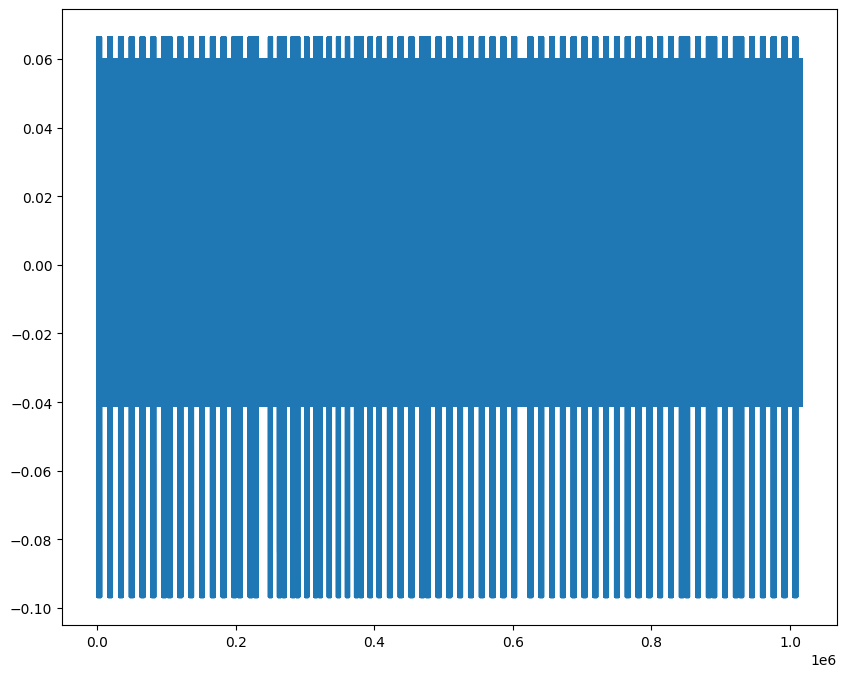

In [58]:
plt.figure(figsize=(10, 8))
err_sales_promo = res_promo_sales.predict(df_raw) - df_raw['NormalizedSalesPromo']
err_sales_promo.plot()
plt.show

#### Normalizacja danych

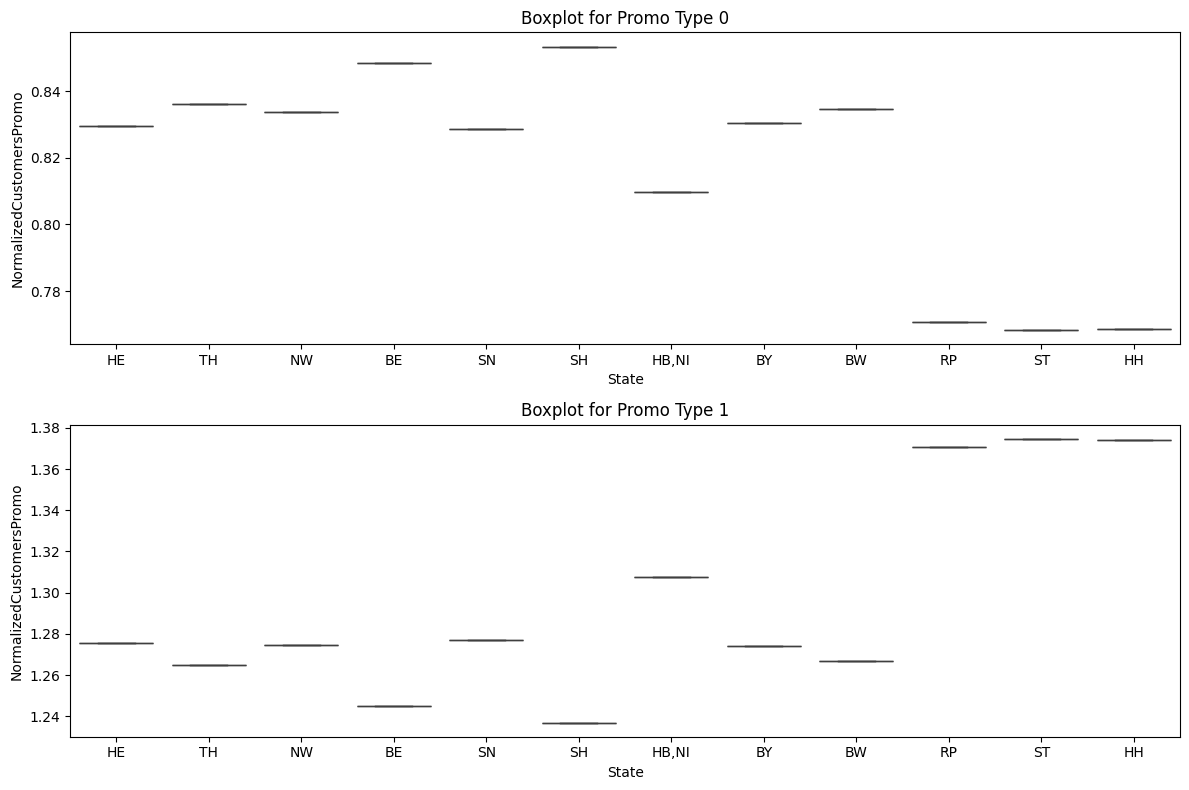

In [59]:
df_raw['NormalizedCustomersPromo'] = df_raw.groupby(['Promo', 'State'])['Customers'].transform('mean') / df_raw.groupby(['State'])['Customers'].transform('mean')

boxPlotPromo(df_raw, 'NormalizedCustomersPromo', states)

#### OLS

In [60]:
model_customers_promo = ols('NormalizedCustomersPromo ~ C(Promo) + C(State) + 1', data=df_raw)
res_promo_customers = model_customers_promo.fit()
print(res_promo_customers.summary())
# plot(df_raw, res_promo_customers, 'Promo', 'NormalizedCustomersPromo')

                               OLS Regression Results                               
Dep. Variable:     NormalizedCustomersPromo   R-squared:                       0.984
Model:                                  OLS   Adj. R-squared:                  0.984
Method:                       Least Squares   F-statistic:                 5.266e+06
Date:                      Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                              02:43:45   Log-Likelihood:             2.1415e+06
No. Observations:                   1017209   AIC:                        -4.283e+06
Df Residuals:                       1017196   BIC:                        -4.283e+06
Df Model:                                12                                         
Covariance Type:                  nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

Wytłumaczalność danych na poziomie  98.4% ale p_value w wielu przypadkach powyżej progu 5%

#### Błąd predykcji

<function matplotlib.pyplot.show(close=None, block=None)>

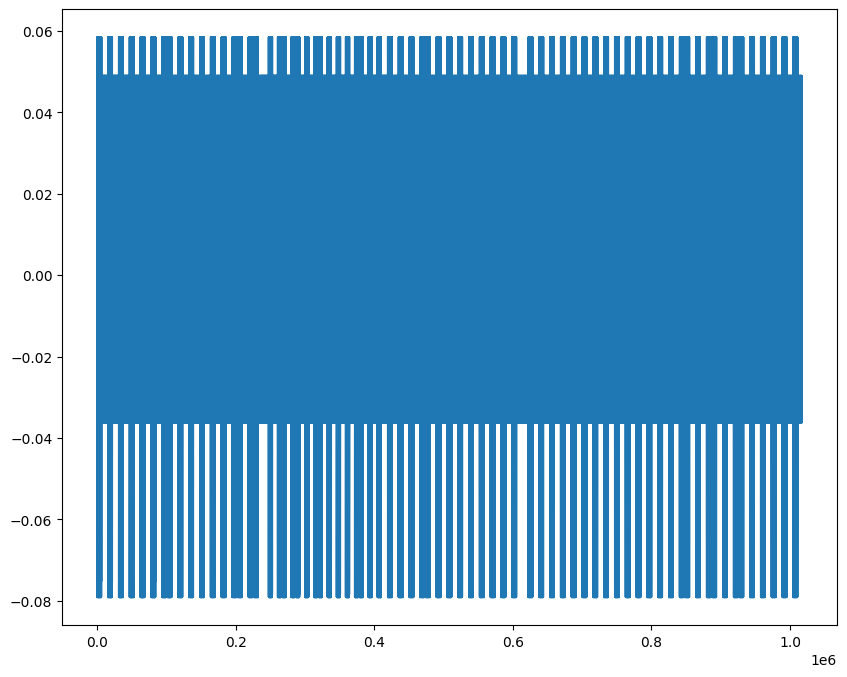

In [61]:
plt.figure(figsize=(10, 8))
err_customers_promo = res_promo_customers.predict(df_raw) - df_raw['NormalizedCustomersPromo']
err_customers_promo.plot()
plt.show

## 4.3.5. Pogoda

#### Ilość typów pogody

In [62]:
print(df_raw['Events'].unique())

df_raw['Events'].value_counts()

[ 0 21 10 17  1 12  6 20 11  9 13  3 14 18 15 16  4  7 19  5  2  8]


10    390553
21    242248
0     122814
1      91396
17     45439
18     41658
13     41118
6      14598
7       7502
4       7098
11      3097
20      2539
14      2482
12      1221
16       682
15       483
19       443
9        426
3        420
5        398
2        308
8        286
Name: Events, dtype: int64

#### Boxploty

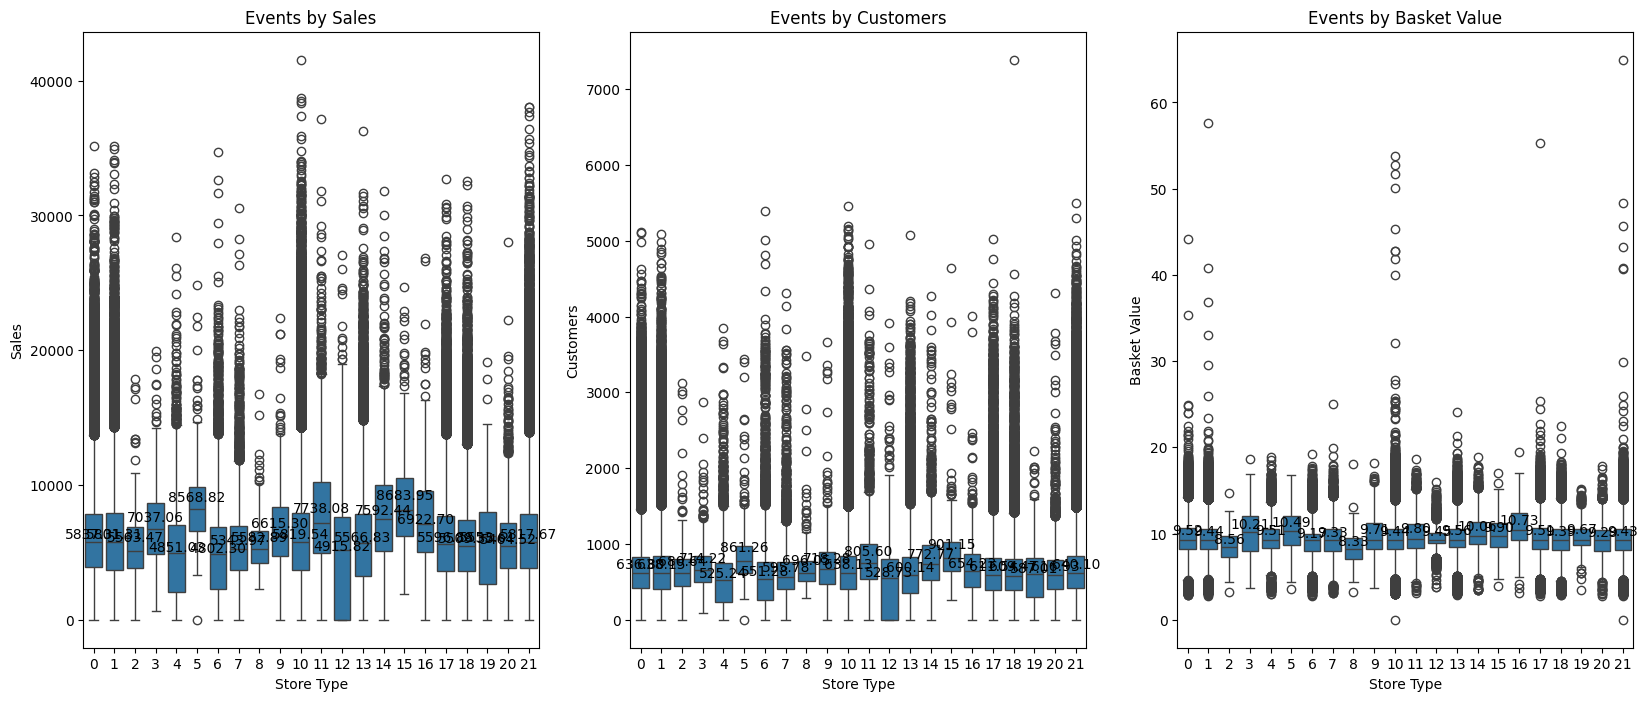

In [63]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.boxplot(x='Events', y='Sales', data=df_raw, ax=ax[0])
ax[0].set_title('Events by Sales')
ax[0].set_xlabel('Store Type')
ax[0].set_ylabel('Sales')


mean_sales = df_raw.groupby('Events')['Sales'].mean()
for i, mean in enumerate(mean_sales):
    ax[0].text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

sns.boxplot(x='Events', y='Customers', data=df_raw, ax=ax[1])
ax[1].set_title('Events by Customers')
ax[1].set_xlabel('Store Type')
ax[1].set_ylabel('Customers')


mean_customers = df_raw.groupby('Events')['Customers'].mean()
for i, mean in enumerate(mean_customers):
    ax[1].text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

sns.boxplot(x='Events', y='BasketValue', data=df_raw, ax=ax[2])
ax[2].set_title('Events by Basket Value')
ax[2].set_xlabel('Store Type')
ax[2].set_ylabel('Basket Value')


mean_basket_value = df_raw.groupby('Events')['BasketValue'].mean()
for i, mean in enumerate(mean_basket_value):
    ax[2].text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

plt.show()

#### Normalizacja danych

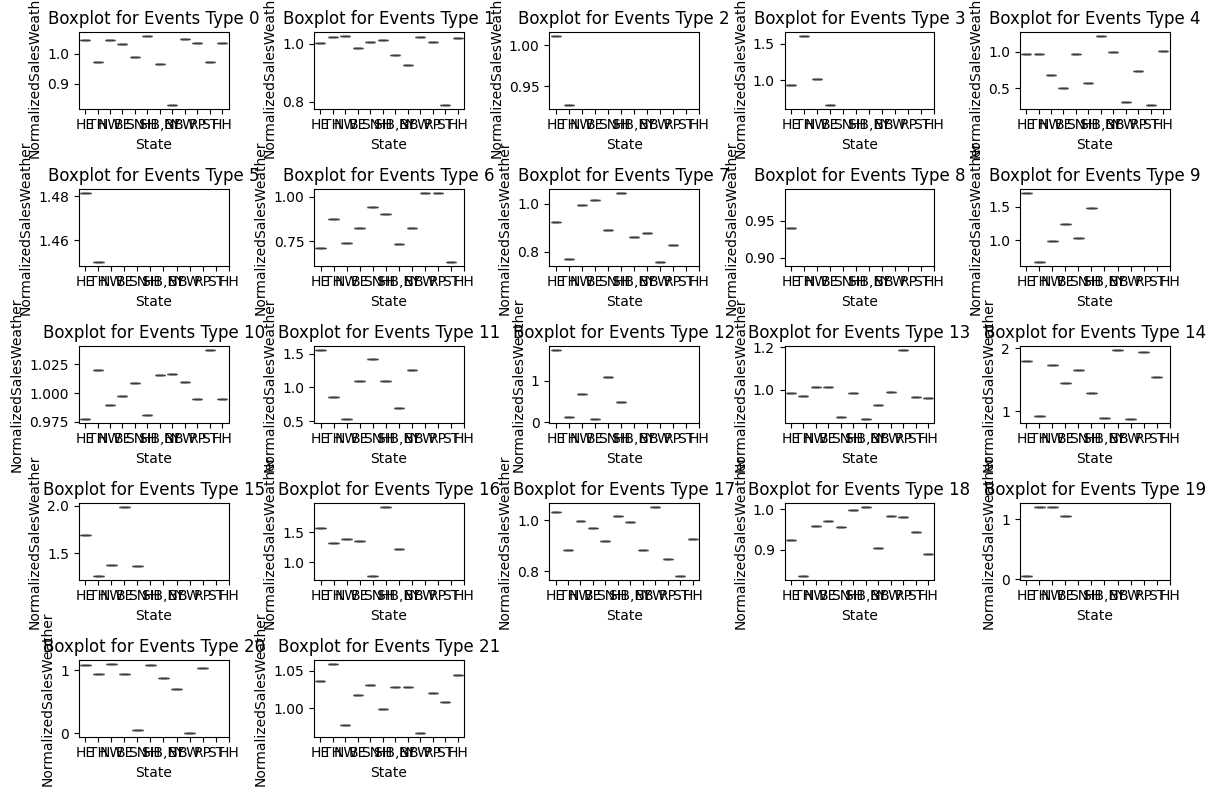

In [64]:
df_raw['NormalizedSalesWeather'] = df_raw.groupby(['Events', 'State'])['Sales'].transform('mean') / df_raw.groupby(['State'])['Sales'].transform('mean')

boxPlotWeather(df_raw, 'NormalizedSalesWeather', states)

#### OLS

In [65]:
model_sales_weather = ols('NormalizedSalesWeather ~ C(Events) + C(State) + 1', data=df_raw)
res_weather_sales = model_sales_weather.fit()
print(res_weather_sales.summary())
# plot(df_raw, res_weather_sales, 'Events', 'NormalizedSalesWeather')

                              OLS Regression Results                              
Dep. Variable:     NormalizedSalesWeather   R-squared:                       0.359
Model:                                OLS   Adj. R-squared:                  0.359
Method:                     Least Squares   F-statistic:                 1.780e+04
Date:                    Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                            02:44:02   Log-Likelihood:             1.5087e+06
No. Observations:                 1017209   AIC:                        -3.017e+06
Df Residuals:                     1017176   BIC:                        -3.017e+06
Df Model:                              32                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
In

Dopasowanie na poziomie 35.9%

#### Błąd dopasowania

<function matplotlib.pyplot.show(close=None, block=None)>

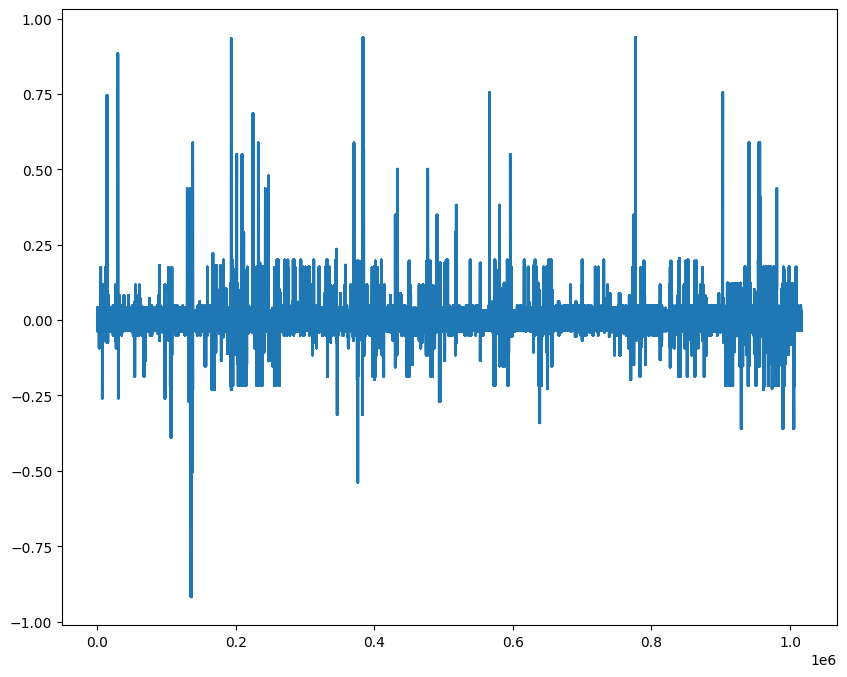

In [66]:
plt.figure(figsize=(10, 8))
err_sales_weather = res_weather_sales.predict(df_raw) - df_raw['NormalizedSalesWeather']
err_sales_weather.plot()
plt.show

#### Normalizacja danych

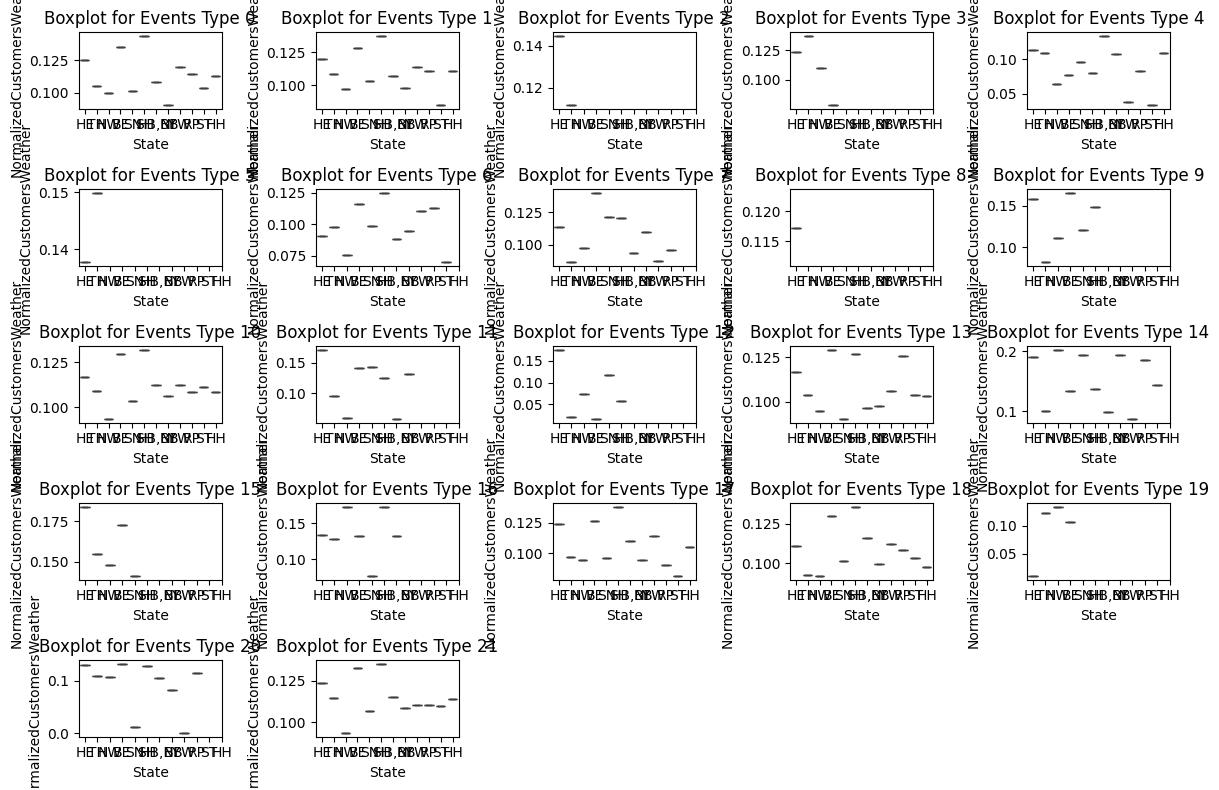

In [67]:
df_raw['NormalizedCustomersWeather'] = df_raw.groupby(['Events', 'State'])['Customers'].transform('mean') / df_raw.groupby(['State'])['Sales'].transform('mean')

boxPlotWeather(df_raw, 'NormalizedCustomersWeather', states)

#### OLS

In [68]:
model_customers_weather = ols('NormalizedCustomersWeather ~ C(Events) + C(State) + 1', data=df_raw)
res_weather_customers = model_customers_weather.fit()
print(res_weather_customers.summary())
# plot(df_raw, res_weather_customers, 'Events', 'NormalizedCustomersWeather')

                                OLS Regression Results                                
Dep. Variable:     NormalizedCustomersWeather   R-squared:                       0.731
Model:                                    OLS   Adj. R-squared:                  0.731
Method:                         Least Squares   F-statistic:                 8.656e+04
Date:                        Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                                02:44:14   Log-Likelihood:             3.8487e+06
No. Observations:                     1017209   AIC:                        -7.697e+06
Df Residuals:                         1017176   BIC:                        -7.697e+06
Df Model:                                  32                                         
Covariance Type:                    nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

Dopasowanie modelu na poziomie 73.1%

#### Błąd modelu

-2.2490827326166483


<function matplotlib.pyplot.show(close=None, block=None)>

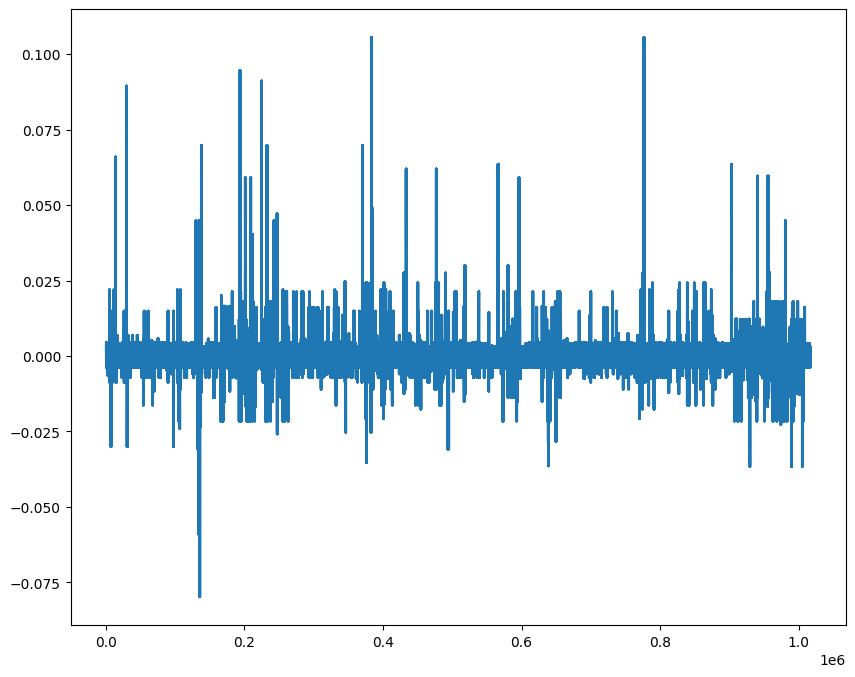

In [69]:
plt.figure(figsize=(10, 8))
pred = res_weather_customers.predict(df_raw)
err_customersweather = pred - df_raw['NormalizedCustomersWeather']
score = r2_score(df_raw['Sales'], pred)
print(score)
err_customersweather.plot()
plt.show

## 4.3.6 Dni wolne

#### Ilość państwowych dni wolnych

In [13]:
print(df_raw['StateHoliday'].unique())

df_raw['StateHoliday'].value_counts()

[0 1 2 3]


0    986159
1     20260
2      6690
3      4100
Name: StateHoliday, dtype: int64

Boxploty

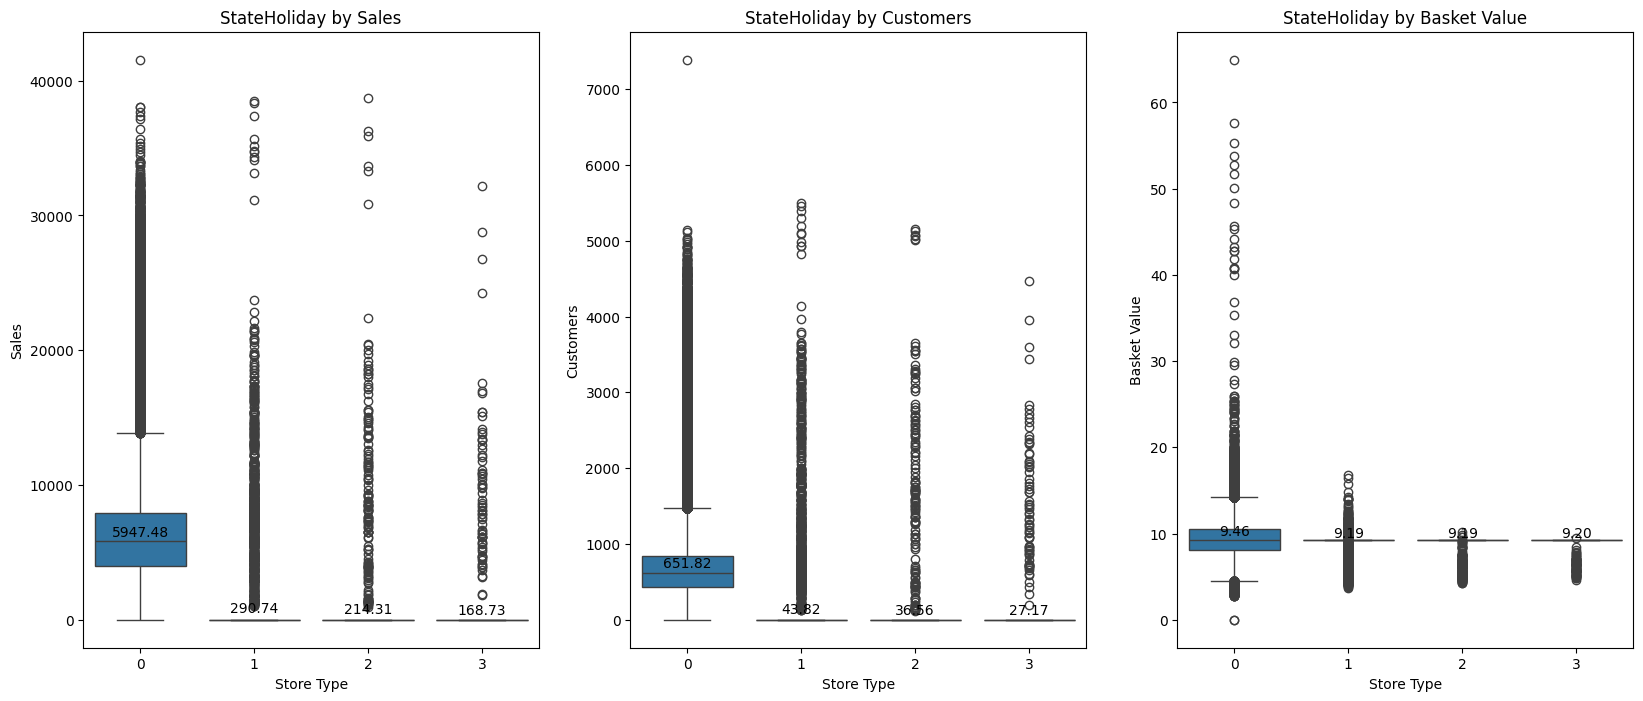

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.boxplot(x='StateHoliday', y='Sales', data=df_raw, ax=ax[0])
ax[0].set_title('StateHoliday by Sales')
ax[0].set_xlabel('Store Type')
ax[0].set_ylabel('Sales')


mean_sales = df_raw.groupby('StateHoliday')['Sales'].mean()
for i, mean in enumerate(mean_sales):
    ax[0].text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

sns.boxplot(x='StateHoliday', y='Customers', data=df_raw, ax=ax[1])
ax[1].set_title('StateHoliday by Customers')
ax[1].set_xlabel('Store Type')
ax[1].set_ylabel('Customers')


mean_customers = df_raw.groupby('StateHoliday')['Customers'].mean()
for i, mean in enumerate(mean_customers):
    ax[1].text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

sns.boxplot(x='StateHoliday', y='BasketValue', data=df_raw, ax=ax[2])
ax[2].set_title('StateHoliday by Basket Value')
ax[2].set_xlabel('Store Type')
ax[2].set_ylabel('Basket Value')


mean_basket_value = df_raw.groupby('StateHoliday')['BasketValue'].mean()
for i, mean in enumerate(mean_basket_value):
    ax[2].text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

plt.show()

#### Normalizacja danych

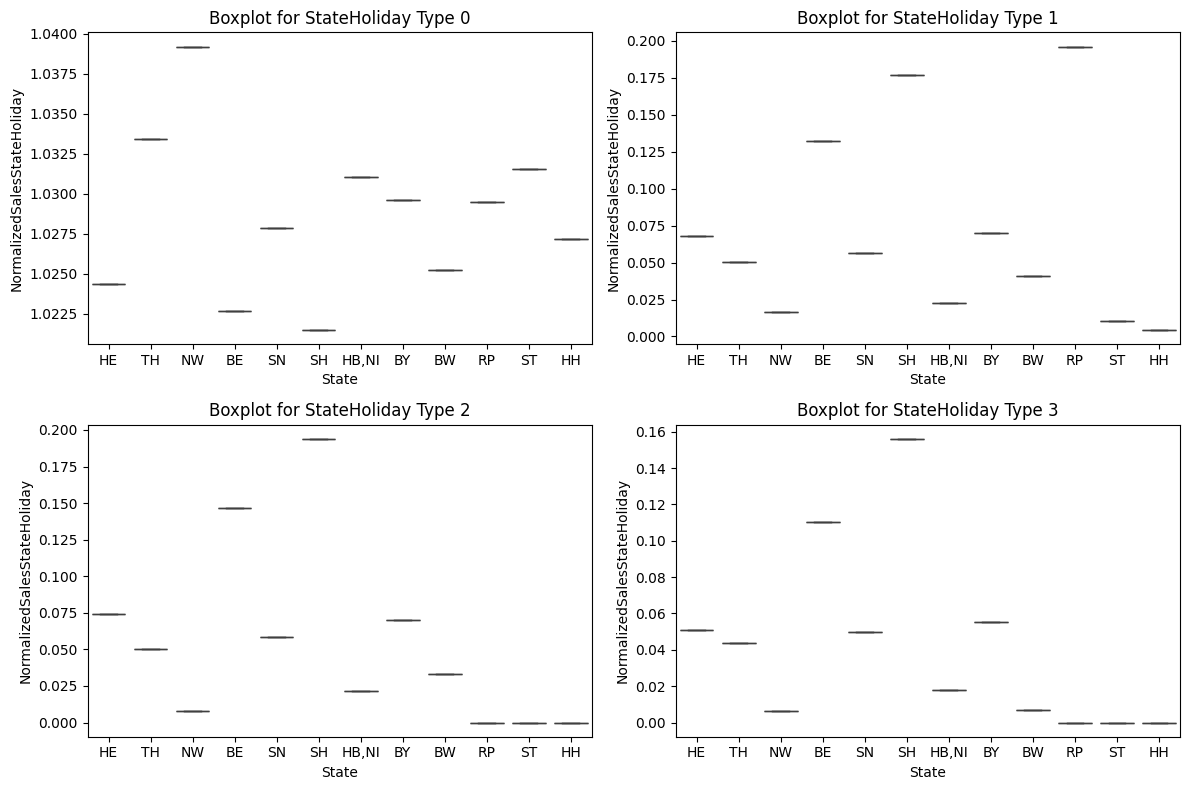

In [19]:
df_raw['NormalizedSalesStateHoliday'] = df_raw.groupby(['StateHoliday', 'State'])['Sales'].transform('mean') / df_raw.groupby(['State'])['Sales'].transform('mean')

boxPlotStateHoliday(df_raw, 'NormalizedSalesStateHoliday', states)

#### OLS

In [20]:
model_sales_state_holiday = ols('NormalizedSalesStateHoliday ~ C(StateHoliday) + C(State) + 1', data=df_raw)
res_state_holiday_sales= model_sales_state_holiday.fit()
print(res_state_holiday_sales.summary())

                                 OLS Regression Results                                
Dep. Variable:     NormalizedSalesStateHoliday   R-squared:                       0.998
Model:                                     OLS   Adj. R-squared:                  0.998
Method:                          Least Squares   F-statistic:                 2.908e+07
Date:                         Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                                 02:52:21   Log-Likelihood:             3.4087e+06
No. Observations:                      1017209   AIC:                        -6.817e+06
Df Residuals:                          1017194   BIC:                        -6.817e+06
Df Model:                                   14                                         
Covariance Type:                     nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

Bardzo dobry model na poziomie 99.8% dopasowania do danych

#### Błąð predykcji

-2.248366987678113


<function matplotlib.pyplot.show(close=None, block=None)>

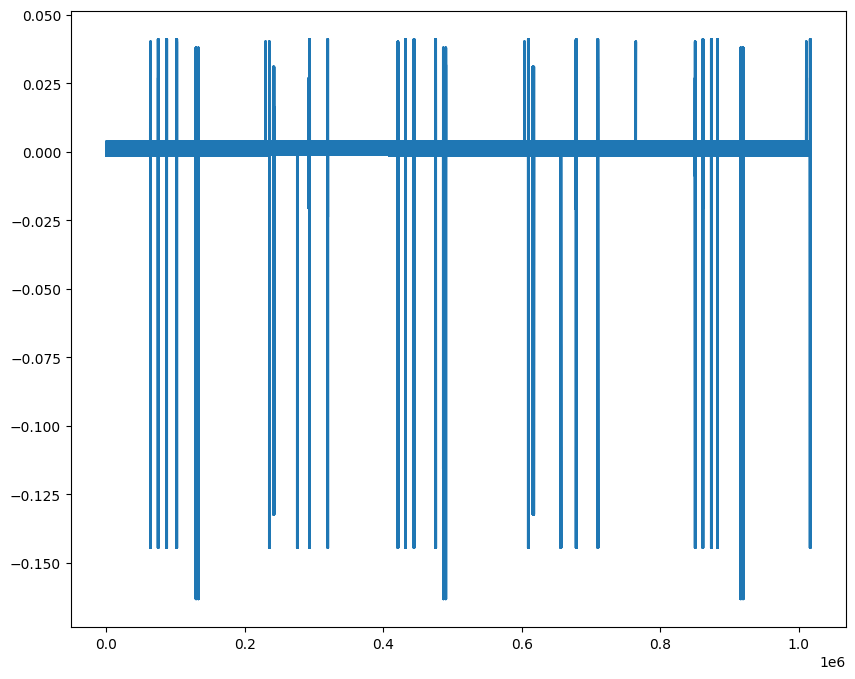

In [21]:
plt.figure(figsize=(10, 8))
pred = res_state_holiday_sales.predict(df_raw)
err_sales_state_holiday= pred - df_raw['NormalizedSalesStateHoliday']
score = r2_score(df_raw['Sales'], pred)
print(score)
err_sales_state_holiday.plot()
plt.show

# 5. Model

#### Do stworzenia modelu zostały wybrane cechy które w największym stopniu tłumaczyły dane. Kierowałem się przy tym wynikami testów OLS oraz t-student. Wymagana również do tego była analiza przedstawionych box plotów po których można było zobaczyć zauważalne trendy pomiędzy cechami które pozwolą na uzyskanie wysokiego dopasowania modelu do danych. W czasie analizy należało również rozważać modele multiplikatywne w celu odseparowania sygnałów o wolnej i szybkiej charakterystyce. W celu dokładniejszej analizy posłużyłem się również separacją danych według landów co pozwoliło na uniknięcie generalizacji wyników i lepsze dopasowanie danych mając na uwadze czynniki działające lokalnie.

In [14]:
model= ols('Sales ~ C(Day) + C(Promo) + C(Month) + C(DayOfWeek) + C(WeekOfMonth) + C(SchoolHoliday) + C(StateHoliday) + C(Events) + 1', data=df_raw)
res= model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                 1.613e+04
Date:                Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                        03:47:03   Log-Likelihood:            -9.4501e+06
No. Observations:             1017209   AIC:                         1.890e+07
Df Residuals:                 1017135   BIC:                         1.890e+07
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              7053.01

Dopasowanie pomiędzy modelem a rzeczywistymi danymi: 0.5365857051666201
OLS MAE: 1765.5130047434452


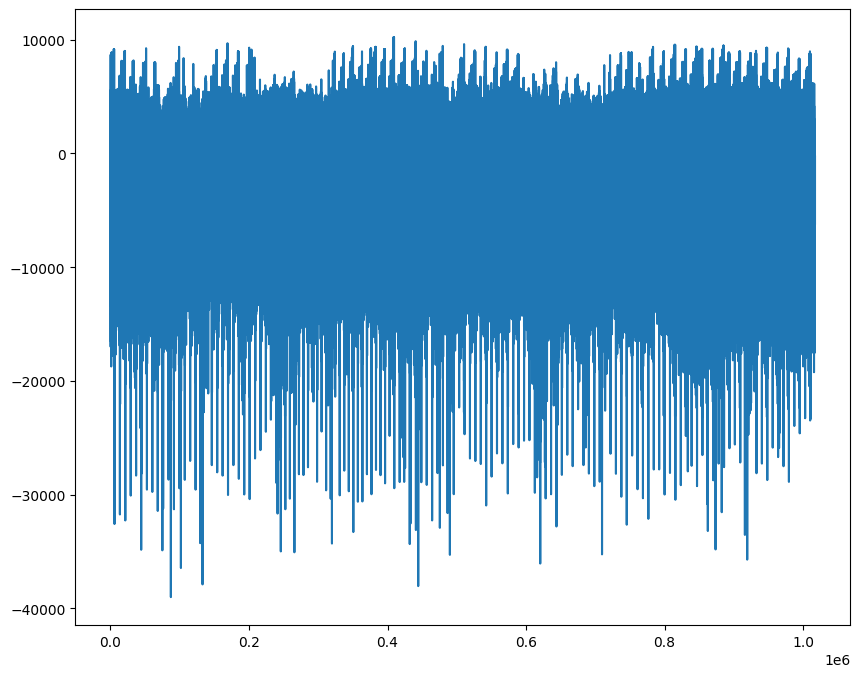

In [15]:
plt.figure(figsize=(10, 8))
pred = res.predict(df_raw)
err = pred - df_raw['Sales']
score = r2_score(df_raw['Sales'], pred)
err.plot()
plt.show
print(f'Dopasowanie pomiędzy modelem a rzeczywistymi danymi: {score}')

ols_mae_value = mean_absolute_error(df_raw['Sales'], pred)
print("OLS MAE:", ols_mae_value)

In [16]:
working_days_sales = df_raw[df_raw['StateHoliday'] == '0']['Sales']
holidays_sales = df_raw[df_raw['StateHoliday'] != '0']['Sales']

t_stat, p_value = stats.ttest_ind(working_days_sales, holidays_sales)

if p_value < 0.05:
    print("Wartość sprzedaży w dni robocze różni się istotnie od dni wolnych.")
else:
    print("Wartość sprzedaży w dni robocze nie różni się istotnie od dni wolnych.")

mean_working_days_sales = working_days_sales.mean()
std_working_days_sales = working_days_sales.std()
lower_bound = mean_working_days_sales - 2 * std_working_days_sales
upper_bound = mean_working_days_sales + 2 * std_working_days_sales
anomalies = df_raw[(df_raw['StateHoliday'] == '0') & ((df_raw['Sales'] < lower_bound) | (df_raw['Sales'] > upper_bound))]

print("Anomalie w sprzedaży w dniach roboczych:")
print(anomalies)


Wartość sprzedaży w dni robocze nie różni się istotnie od dni wolnych.
Anomalie w sprzedaży w dniach roboczych:
Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval, State, Max_TemperatureC, Mean_TemperatureC, Min_TemperatureC, Dew_PointC, MeanDew_PointC, Min_DewpointC, Max_Humidity, Mean_Humidity, Min_Humidity, Max_Sea_Level_PressurehPa, Mean_Sea_Level_PressurehPa, Min_Sea_Level_PressurehPa, Max_VisibilityKm, Mean_VisibilityKm, Min_VisibilitykM, Max_Wind_SpeedKm_h, Mean_Wind_SpeedKm_h, Max_Gust_SpeedKm_h, Precipitationmm, CloudCover, Events, WindDirDegrees, Day, Month, Year, WeekOfMonth, BasketValue]
Index: []

[0 rows x 46 columns]


In [17]:
end_of_may = pd.to_datetime('2015-05-31')
end_of_july = pd.to_datetime('2015-07-31')
df_cut = df_raw[(df_raw['Date'] >= end_of_may) & (df_raw['Date'] <= end_of_july)]

dates = pd.date_range(start='2015-06-01', end='2015-07-31', freq='D')

df_cut.loc[:, 'Sales'] = res.predict(df_cut)

actual_sales = df_raw[df_raw['Date'].isin(dates)]['Sales']
predicted_sales = df_cut[df_cut['Date'].isin(dates)]['Sales']
error = actual_sales - predicted_sales
mae = error.abs().mean()

# print(actual_sales)
# print(predicted_sales)
# print(df_cut['Sales'])

# print("Przewidywane wartości sprzedaży dla kolejnych 8 dni:")
# print(df_cut[df_cut['Date'].isin(dates)])
print("\nBłąd dopasowania modelu:")
print(error)
print("\nŚredni błąd dopasowania modelu:")
print(mae)



Błąd dopasowania modelu:
0        -3455.717775
1        -2654.717775
2         -404.717775
3         5316.436167
4        -3856.563833
             ...     
68010    -1527.844721
68011     7903.155279
68012     -615.149524
68013    17646.850476
68014    -1229.844721
Name: Sales, Length: 68015, dtype: float64

Średni błąd dopasowania modelu:
1751.5816229240822


/tmp/ipykernel_11318/3723684430.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut.loc[:, 'Sales'] = res.predict(df_cut)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_models[['Promo', 'Month', 'DayOfWeek', 'WeekOfMonth', 'SchoolHoliday', 'StateHoliday', 'Events']], df_models['Sales'], test_size=0.2, random_state=42)

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

forest_preds = forest_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

forest_mse = mean_absolute_error(y_test, forest_preds)
xgb_mse = mean_absolute_error(y_test, xgb_preds)

print("Random Forest MSE:", forest_mse)
print("XGBoost MSE:", xgb_mse)


Random Forest MSE: 1657.336227891206
XGBoost MSE: 1662.985186939324


Za pomocą metod drzew decyzyjnych oraz xgboost zostały uzyskane lepsze wyniki. Dzięki analizie udało się ograniczyć ilość wykorzystywanych cech co pozwoliło zaoszczędzić czas na tworzenie modelu oraz zrozumieć lepiej otrzyamne dane oraz model.

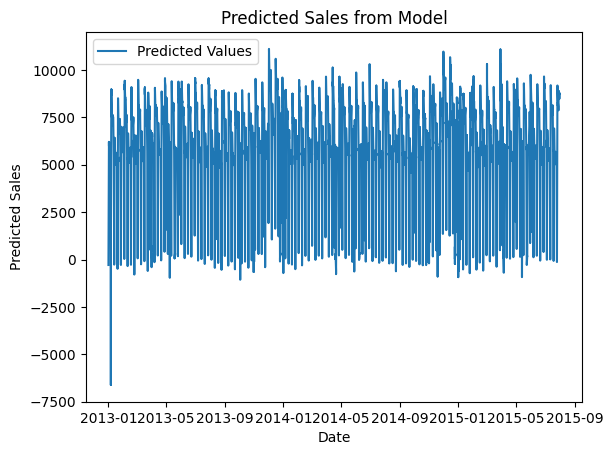

In [28]:
plt.plot(df_raw['Date'], pred, label='Predicted Values')
plt.xlabel('Date')
plt.ylabel('Predicted Sales')
plt.title('Predicted Sales from Model')
plt.legend()
plt.show()


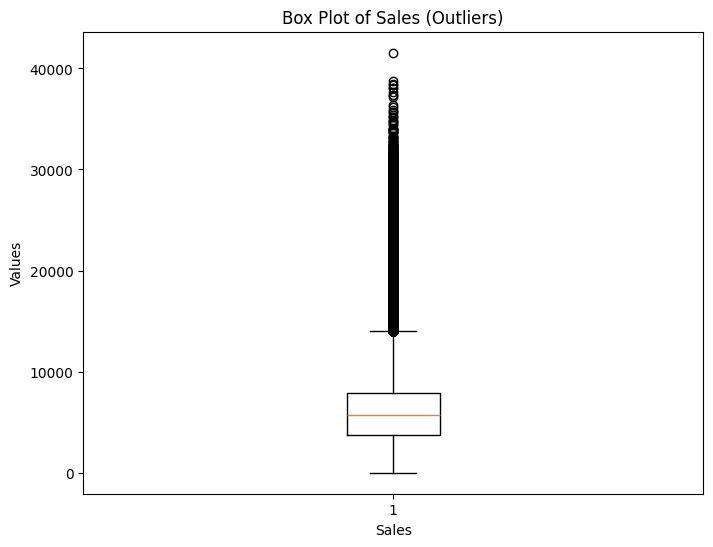

Liczba obserwacji przed usunięciem outlierów: 1017209
Liczba obserwacji po usunięciu outlierów: 973313


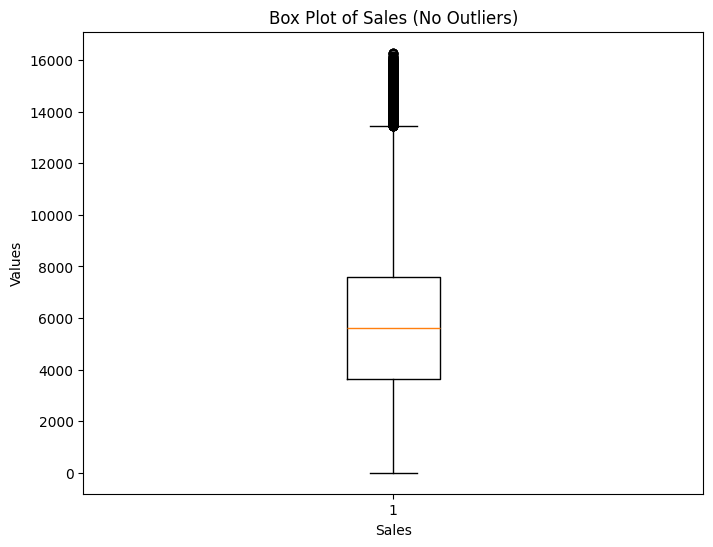

In [34]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_raw['Sales'])
plt.xlabel('Sales')
plt.ylabel('Values')
plt.title('Box Plot of Sales (Outliers)')
plt.show()

residuals = df_raw['Sales'] - pred

mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)

lower_limit = mean_residuals - 2 * std_residuals
upper_limit = mean_residuals + 2 * std_residuals

df_no_outliers = df_raw[(residuals >= lower_limit) & (residuals <= upper_limit)]

print(f"Liczba obserwacji przed usunięciem outlierów: {len(df_raw)}")
print(f"Liczba obserwacji po usunięciu outlierów: {len(df_no_outliers)}")


plt.figure(figsize=(8, 6))
plt.boxplot(df_no_outliers['Sales'])
plt.xlabel('Sales')
plt.ylabel('Values')
plt.title('Box Plot of Sales (No Outliers)')
plt.show()



Na podstawie predykcji z modelu OLS zostały usunięte outliery z oryginalnego datasetu.